# SuperMarket Clustering Task
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis (EDA)

In [4]:
# Read Data
sup = pd.read_csv('/Users/mohammad/Downloads/ECommerce_consumer behaviour.csv')
sup

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                           NaN          17                  1          0   
1                           NaN          91                  2          0   
2                           NaN          36                  3          0   
3                           NaN          83                  4          0   
4                           NaN          83                  5          0   
...                         ...         ...                ...        ...   
2019496                     5.0          83                  8          0   
2019497                     3.0         115                  1          1   
2019498                     3.0          32                  2          1   
2019499                     3.0          32                  3          1   
2019500                     3.0         123                  4          1   

         department_id  department                   product_name  
0                   13      pantry             baking ingredients  
1                   16  dairy eggs                soy lactosefree  
2                   16  dairy eggs                         butter  
3                    4     produce               fresh vegetables  
4                    4     produce               fresh vegetables  
...                ...         ...                            ...  
2019496              4     produce               fresh vegetables  
2019497              7   beverages  water seltzer sparkling water  
2019498              4     produce               packaged produce  
2019499              4     produce               packaged produce  
2019500              4     produce     packaged vegetables fruits  

[2019501 rows x 12 columns]

__Supermarket consumer behaviour__ dataset consists of 2019501 Rows & 12 Columns :
* order_id – (A unique number to identity the order)
* user_id - (A unique number to identify the user)
* order_number – (Number of the order)
* order_dow – (Day of the Week the order was made)
* order_hour_of_day – (Time of the order)
* days_since_prior_order - (History of the order)
* product_id – (Id of the product)
* add_to_cart_order – (Number of items added to cart)
* reordered – (If the reorder took place)
* department_id - (Unique number allocated to each department)
* department – (Names of the departments)
* product_name – (Name of the products)

In [5]:
sup.describe()

order_id       user_id  order_number     order_dow  \
count  2.019501e+06  2.019501e+06  2.019501e+06  2.019501e+06   
mean   1.707013e+06  1.030673e+05  1.715138e+01  2.735367e+00   
std    9.859832e+05  5.949117e+04  1.752576e+01  2.093882e+00   
min    1.000000e+01  2.000000e+00  1.000000e+00  0.000000e+00   
25%    8.526490e+05  5.158400e+04  5.000000e+00  1.000000e+00   
50%    1.705004e+06  1.026900e+05  1.100000e+01  3.000000e+00   
75%    2.559031e+06  1.546000e+05  2.400000e+01  5.000000e+00   
max    3.421080e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order    product_id  \
count       2.019501e+06            1.895159e+06  2.019501e+06   
mean        1.343948e+01            1.138603e+01  7.120590e+01   
std         4.241008e+00            8.970980e+00  3.820727e+01   
min         0.000000e+00            0.000000e+00  1.000000e+00   
25%         1.000000e+01            5.000000e+00  3.100000e+01   
50%         1.300000e+01            8.000000e+00  8.300000e+01   
75%         1.600000e+01            1.500000e+01  1.070000e+02   
max         2.300000e+01            3.000000e+01  1.340000e+02   

       add_to_cart_order     reordered  department_id  
count       2.019501e+06  2.019501e+06   2.019501e+06  
mean        8.363173e+00  5.897427e-01   9.928349e+00  
std         7.150059e+00  4.918804e-01   6.282933e+00  
min         1.000000e+00  0.000000e+00   1.000000e+00  
25%         3.000000e+00  0.000000e+00   4.000000e+00  
50%         6.000000e+00  1.000000e+00   9.000000e+00  
75%         1.100000e+01  1.000000e+00   1.600000e+01  
max         1.370000e+02  1.000000e+00   2.100000e+01

In [6]:
sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [7]:
sup.duplicated().sum()

0

In [8]:
sup.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [9]:
# Check for missing values
sup.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [11]:
imputer = IterativeImputer(random_state=42)
sup_handle_missing_value = imputer.fit_transform(sup.loc[:, 'order_id':'department_id'])
sup_imputed = pd.concat([pd.DataFrame(sup_handle_missing_value), sup[['department', 'product_name']]], axis=1)

In [12]:
sup_imputed.columns = sup.columns
sup_imputed

order_id   user_id  order_number  order_dow  order_hour_of_day  \
0        2425083.0   49125.0           1.0        2.0               18.0   
1        2425083.0   49125.0           1.0        2.0               18.0   
2        2425083.0   49125.0           1.0        2.0               18.0   
3        2425083.0   49125.0           1.0        2.0               18.0   
4        2425083.0   49125.0           1.0        2.0               18.0   
...            ...       ...           ...        ...                ...   
2019496  3390742.0  199430.0          16.0        3.0               18.0   
2019497   458285.0  128787.0          42.0        2.0               19.0   
2019498   458285.0  128787.0          42.0        2.0               19.0   
2019499   458285.0  128787.0          42.0        2.0               19.0   
2019500   458285.0  128787.0          42.0        2.0               19.0   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     14.501533        17.0                1.0        0.0   
1                     14.651952        91.0                2.0        0.0   
2                     14.627221        36.0                3.0        0.0   
3                     14.788901        83.0                4.0        0.0   
4                     14.843111        83.0                5.0        0.0   
...                         ...         ...                ...        ...   
2019496                5.000000        83.0                8.0        0.0   
2019497                3.000000       115.0                1.0        1.0   
2019498                3.000000        32.0                2.0        1.0   
2019499                3.000000        32.0                3.0        1.0   
2019500                3.000000       123.0                4.0        1.0   

         department_id  department                   product_name  
0                 13.0      pantry             baking ingredients  
1                 16.0  dairy eggs                soy lactosefree  
2                 16.0  dairy eggs                         butter  
3                  4.0     produce               fresh vegetables  
4                  4.0     produce               fresh vegetables  
...                ...         ...                            ...  
2019496            4.0     produce               fresh vegetables  
2019497            7.0   beverages  water seltzer sparkling water  
2019498            4.0     produce               packaged produce  
2019499            4.0     produce               packaged produce  
2019500            4.0     produce     packaged vegetables fruits  

[2019501 rows x 12 columns]

In [13]:
sup_imputed['days_since_prior_order'] = sup_imputed['days_since_prior_order'].astype(np.int64)

In [14]:
sup_imputed

order_id   user_id  order_number  order_dow  order_hour_of_day  \
0        2425083.0   49125.0           1.0        2.0               18.0   
1        2425083.0   49125.0           1.0        2.0               18.0   
2        2425083.0   49125.0           1.0        2.0               18.0   
3        2425083.0   49125.0           1.0        2.0               18.0   
4        2425083.0   49125.0           1.0        2.0               18.0   
...            ...       ...           ...        ...                ...   
2019496  3390742.0  199430.0          16.0        3.0               18.0   
2019497   458285.0  128787.0          42.0        2.0               19.0   
2019498   458285.0  128787.0          42.0        2.0               19.0   
2019499   458285.0  128787.0          42.0        2.0               19.0   
2019500   458285.0  128787.0          42.0        2.0               19.0   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                            14        17.0                1.0        0.0   
1                            14        91.0                2.0        0.0   
2                            14        36.0                3.0        0.0   
3                            14        83.0                4.0        0.0   
4                            14        83.0                5.0        0.0   
...                         ...         ...                ...        ...   
2019496                       5        83.0                8.0        0.0   
2019497                       3       115.0                1.0        1.0   
2019498                       3        32.0                2.0        1.0   
2019499                       3        32.0                3.0        1.0   
2019500                       3       123.0                4.0        1.0   

         department_id  department                   product_name  
0                 13.0      pantry             baking ingredients  
1                 16.0  dairy eggs                soy lactosefree  
2                 16.0  dairy eggs                         butter  
3                  4.0     produce               fresh vegetables  
4                  4.0     produce               fresh vegetables  
...                ...         ...                            ...  
2019496            4.0     produce               fresh vegetables  
2019497            7.0   beverages  water seltzer sparkling water  
2019498            4.0     produce               packaged produce  
2019499            4.0     produce               packaged produce  
2019500            4.0     produce     packaged vegetables fruits  

[2019501 rows x 12 columns]

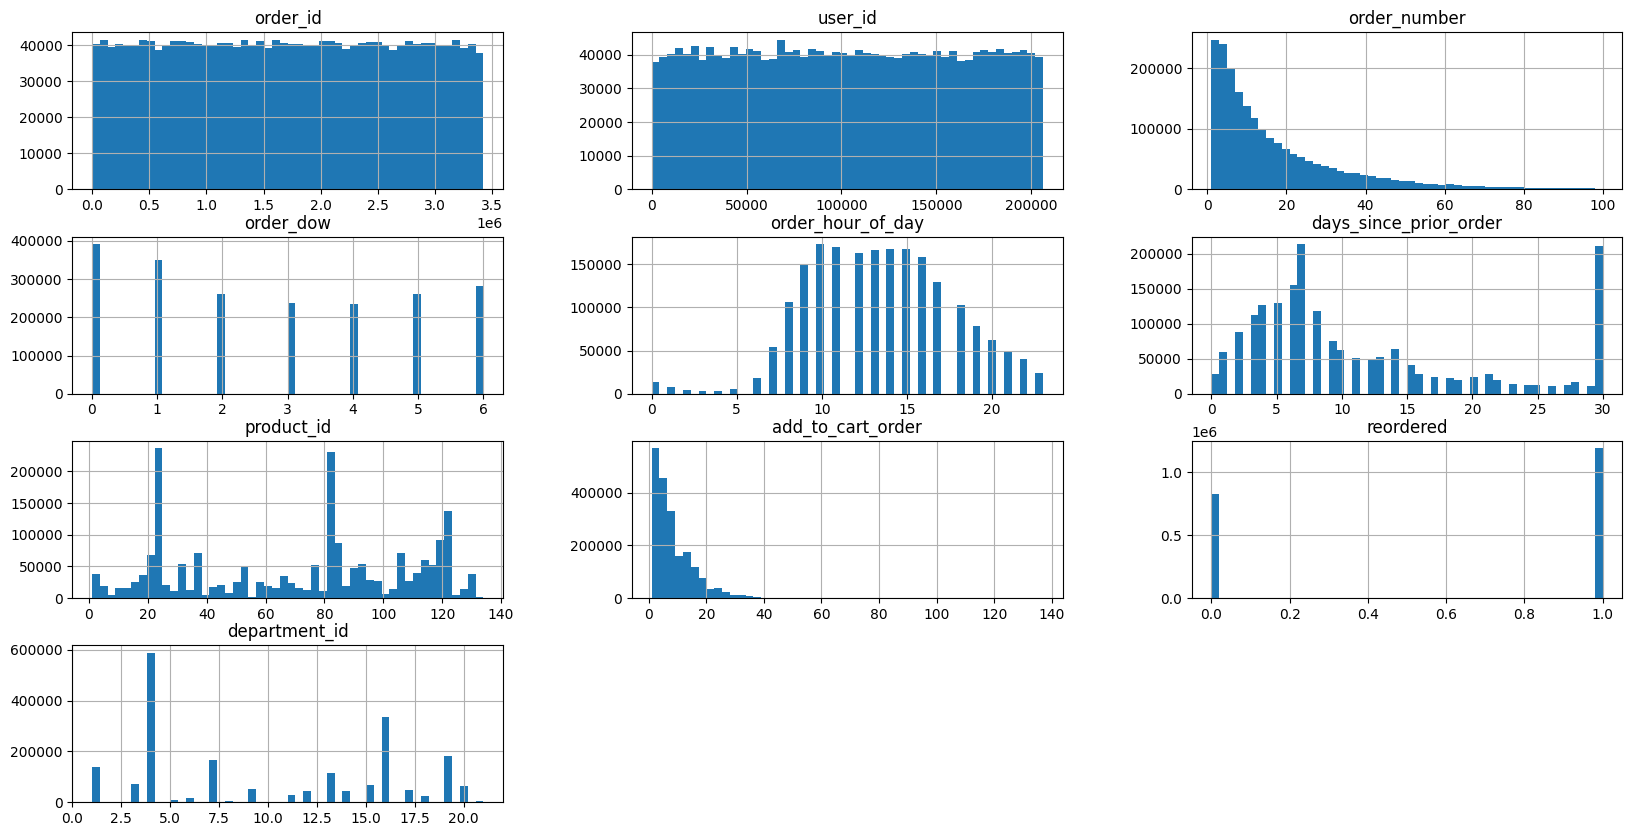

In [15]:
sup.hist(bins=50, figsize=(20, 10))
plt.show()

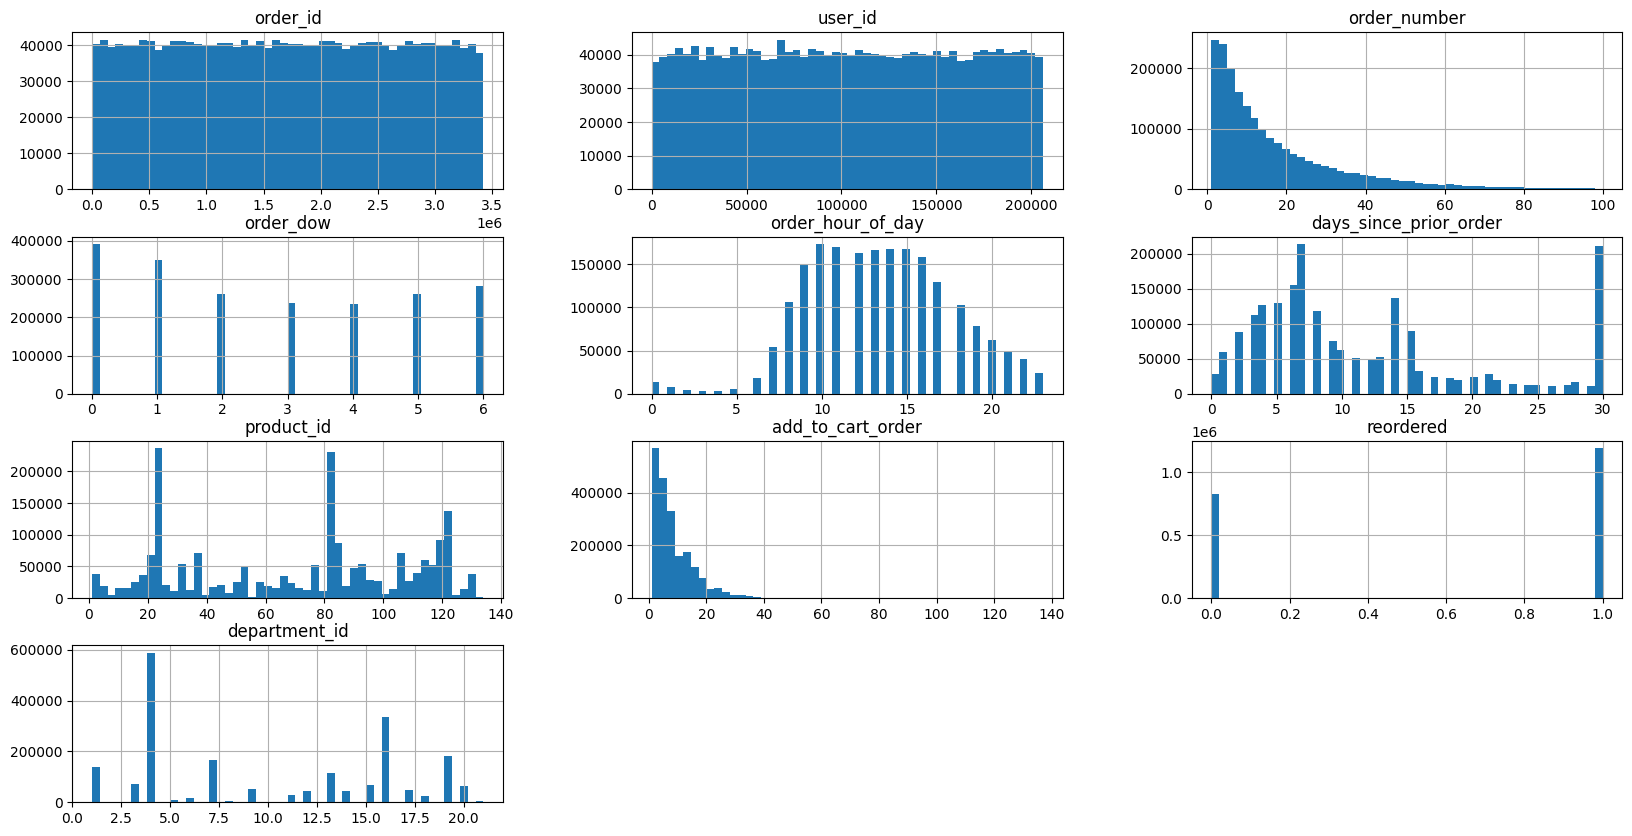

In [16]:
sup_imputed.hist(bins=50, figsize=(20, 10))
plt.show()

In [17]:
sup_imputed.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [18]:
sup_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                float64
 1   user_id                 float64
 2   order_number            float64
 3   order_dow               float64
 4   order_hour_of_day       float64
 5   days_since_prior_order  int64  
 6   product_id              float64
 7   add_to_cart_order       float64
 8   reordered               float64
 9   department_id           float64
 10  department              object 
 11  product_name            object 
dtypes: float64(9), int64(1), object(2)
memory usage: 184.9+ MB


In [19]:
for col in sup_imputed.columns:
    if sup_imputed[col].dtype == 'float64':
        sup_imputed[col] = sup_imputed[col].astype(np.int64)

In [20]:
sup_copy = sup_imputed.copy()

#### Order Id

In [21]:
sup_imputed['order_id'].describe()

count    2.019501e+06
mean     1.707013e+06
std      9.859832e+05
min      1.000000e+01
25%      8.526490e+05
50%      1.705004e+06
75%      2.559031e+06
max      3.421080e+06
Name: order_id, dtype: float64

In [22]:
sup_imputed['order_id'].value_counts()

order_id
790903     137
2621625    109
416346     100
1031566     95
1930316     93
          ... 
2616869      1
1043968      1
47105        1
1923284      1
460941       1
Name: count, Length: 200000, dtype: int64

#### User Id

In [23]:
sup_imputed['user_id'].describe()

count    2.019501e+06
mean     1.030673e+05
std      5.949117e+04
min      2.000000e+00
25%      5.158400e+04
50%      1.026900e+05
75%      1.546000e+05
max      2.062090e+05
Name: user_id, dtype: float64

In [24]:
sup_imputed['user_id'].value_counts()

user_id
176478    460
129928    405
126305    384
201268    347
115495    283
         ... 
124195      1
192874      1
73682       1
118192      1
170728      1
Name: count, Length: 105273, dtype: int64

#### Order Number

In [25]:
sup_imputed['order_number'].describe()

count    2.019501e+06
mean     1.715138e+01
std      1.752576e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.400000e+01
max      1.000000e+02
Name: order_number, dtype: float64

In [26]:
sup_imputed['order_number'].value_counts()

order_number
1      124342
2      122397
3      120627
4      118573
5      105482
        ...  
97        834
91        826
95        741
99        716
100       493
Name: count, Length: 100, dtype: int64

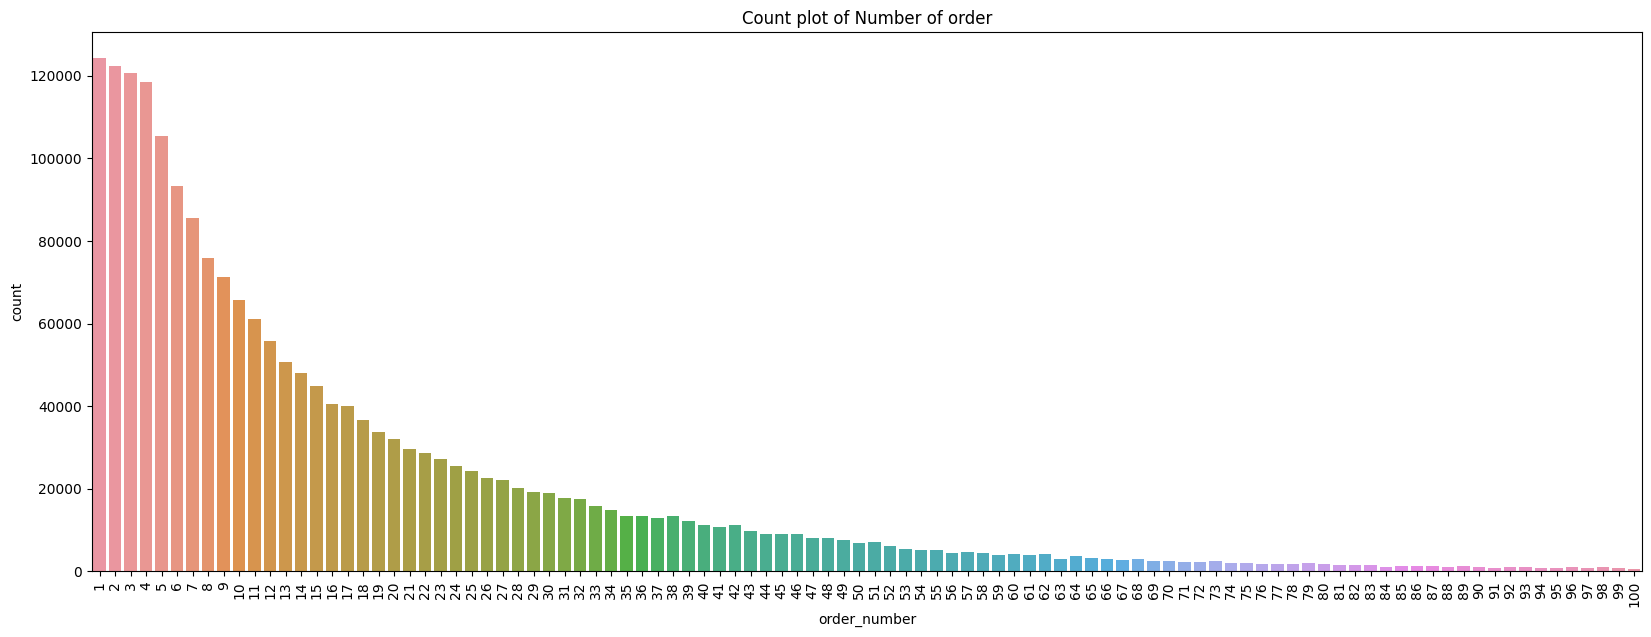

In [27]:
plt.figure(figsize=(20, 7))
sns.countplot(x=sup_imputed['order_number'])
plt.title('Count plot of Number of order')
plt.xticks(rotation=90)
plt.show()

### Conclusion for Order Number Analysis
According to the plot, we can see that the order number is skewed to the left and almost 50% of the order numbers are between 1 and 11.

#### Order DOW

In [28]:
sup_imputed['order_dow'].describe()

count    2.019501e+06
mean     2.735367e+00
std      2.093882e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: order_dow, dtype: float64

In [29]:
sup_imputed['order_dow'].value_counts()

order_dow
0    391831
1    349236
6    280751
5    262157
2    261912
3    238730
4    234884
Name: count, dtype: int64

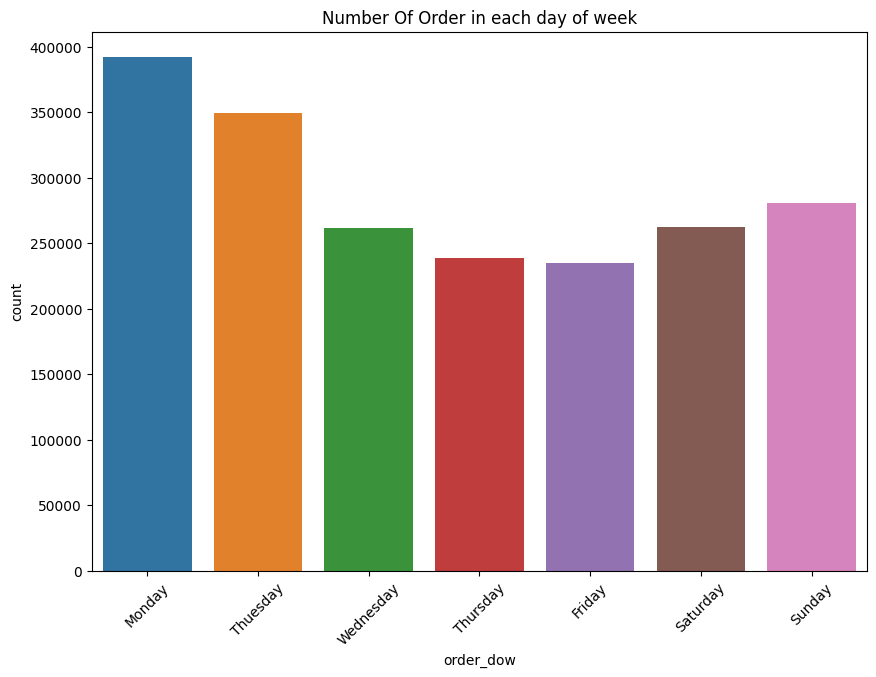

In [30]:
plt.figure(figsize=(10, 7))
sns.countplot(x=sup_imputed['order_dow'])
plt.title('Number Of Order in each day of week')
plt.xticks(np.arange(0, 7), ['Monday', 'Thuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()

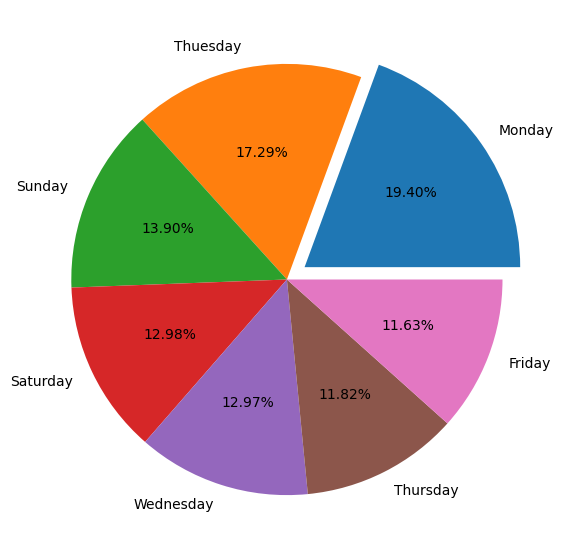

In [31]:
plt.figure(figsize=(10, 7))
labels = ['Monday', 'Thuesday', 'Sunday', 'Saturday', 'Wednesday', 'Thursday', 'Friday']
plt.pie(sup_imputed['order_dow'].value_counts(), explode=[0.10, 0, 0, 0, 0, 0, 0], labels=labels, autopct='%.2f%%')
plt.show()

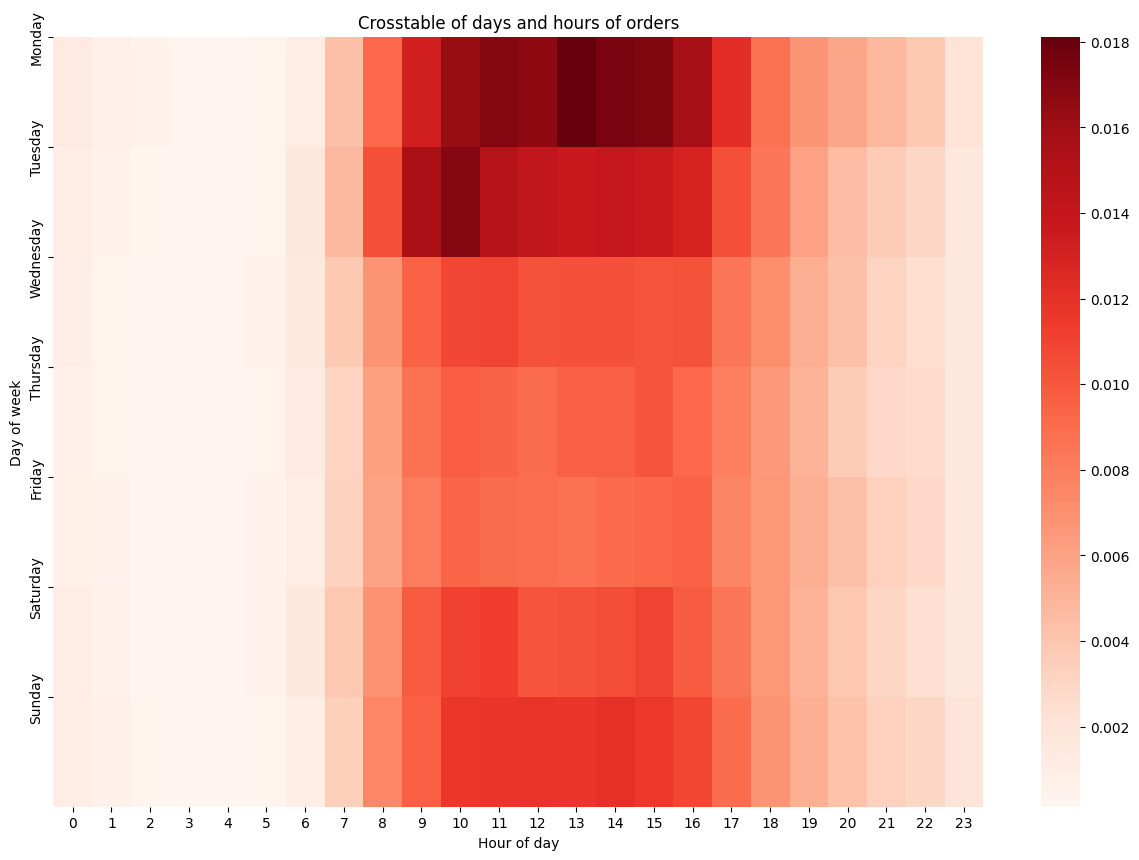

In [32]:
dayhour = sup_imputed.groupby(['order_dow', 'order_hour_of_day'])['user_id'].aggregate('count').reset_index()
dayhour_p = dayhour.pivot(index='order_dow', columns='order_hour_of_day', values='user_id') / sup_imputed.shape[0]

plt.figure(figsize=(15,10))
sns.heatmap(dayhour_p, cmap='Reds')
plt.yticks([0, 1, 2, 3, 4, 5, 6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Hour of day')
plt.ylabel('Day of week')
plt.title('Crosstable of days and hours of orders')
plt.show()

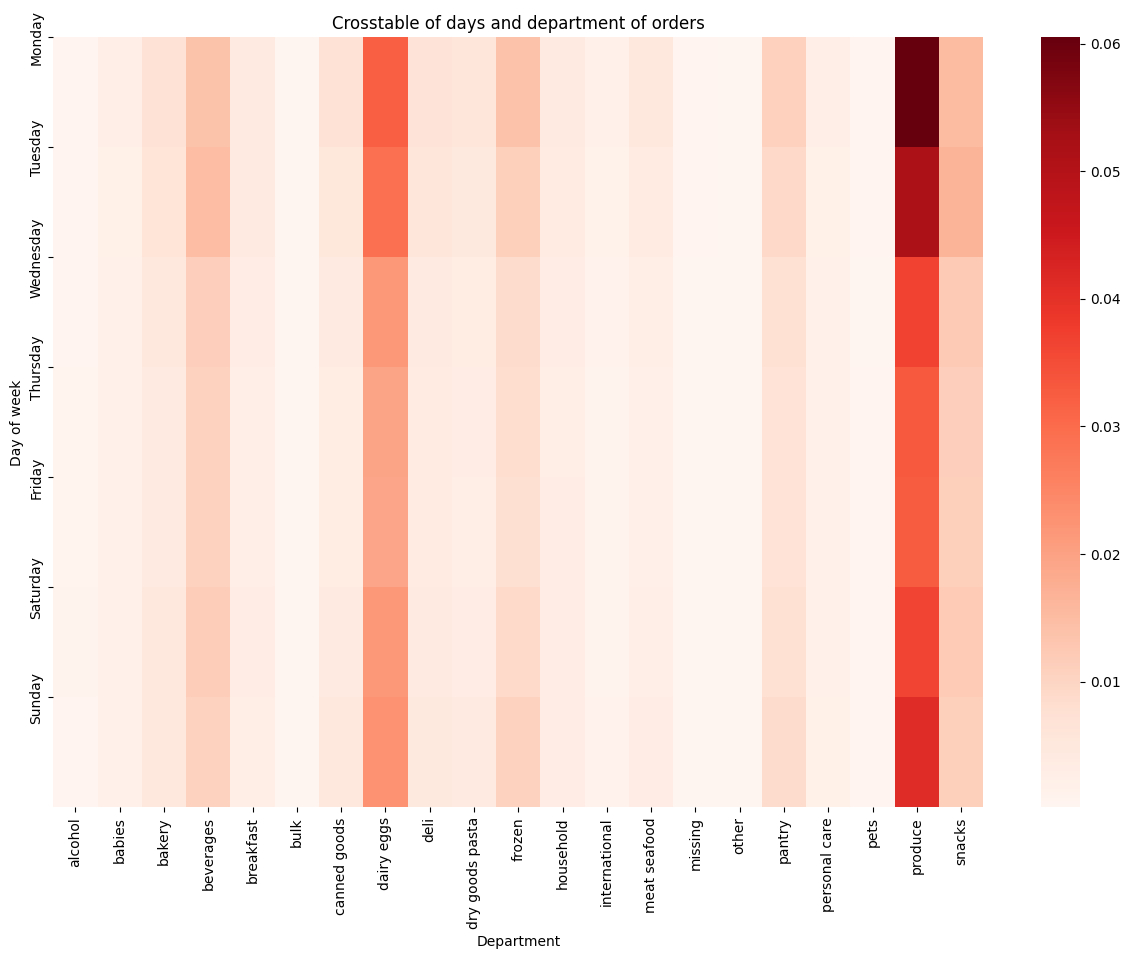

In [33]:
department = sup_imputed.groupby(['order_dow', 'department'])['user_id'].aggregate('count').reset_index().sort_values(by='user_id', ascending=False)
department_p = department.pivot(index='order_dow', columns='department', values='user_id') / sup_imputed.shape[0]


plt.figure(figsize=(15,10))
sns.heatmap(department_p, cmap='Reds')
plt.yticks([0, 1, 2, 3, 4, 5, 6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Department')
plt.ylabel('Day of week')
plt.title('Crosstable of days and department of orders')
plt.show()

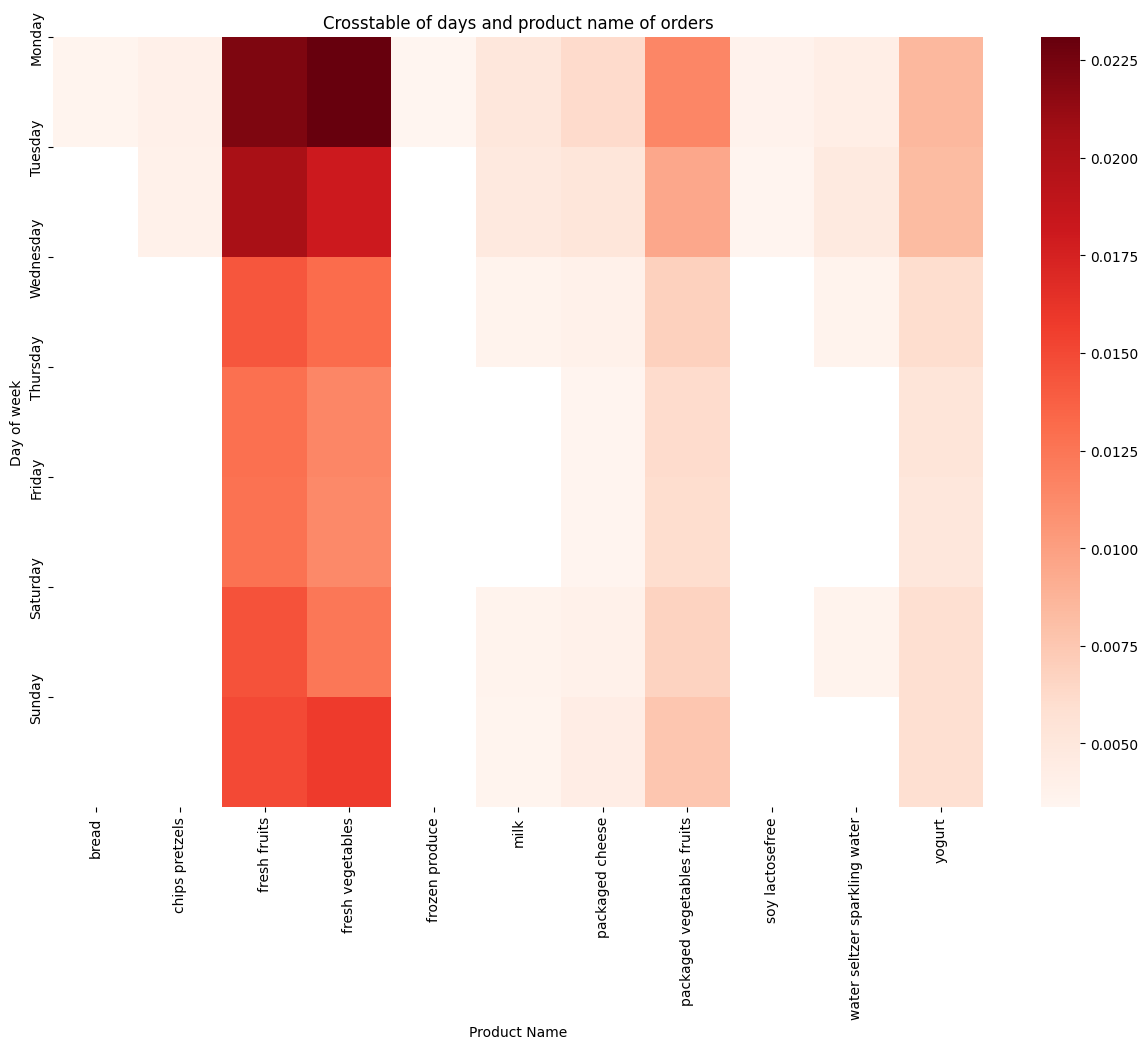

In [34]:
department = sup_imputed.groupby(['order_dow', 'product_name'])['user_id'].count().reset_index().sort_values(by='user_id', ascending=False).head(50)
department_p = department.pivot(index='order_dow', columns='product_name', values='user_id') / sup_imputed.shape[0]


plt.figure(figsize=(15,10))
sns.heatmap(department_p, cmap='Reds')
plt.yticks([0, 1, 2, 3, 4, 5, 6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Product Name')
plt.ylabel('Day of week')
plt.title('Crosstable of days and product name of orders')
plt.show()

### Conclusion for Order DOW analysis
According to the count plot and pie plot, we see that the top 4 for order number are the first two days of the week and the two days of the weekend, that is, Monday, Tuesday and Saturday, Sunday.

According to the heatmap, We see that most of the orders were on the first and last days of week between 10:00 and 16:00.

#### Order Hour Of Day

In [35]:
sup_imputed['order_hour_of_day'].describe()

count    2.019501e+06
mean     1.343948e+01
std      4.241008e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [36]:
sup_imputed['order_hour_of_day'].value_counts()

order_hour_of_day
10    173306
11    170291
14    167831
15    167157
13    166376
12    163511
16    158247
9     150248
17    129383
8     106754
18    102416
19     78516
20     62110
7      54143
21     48857
22     40762
23     24331
6      18293
0      13481
1       7283
5       5732
2       4210
4       3269
3       2994
Name: count, dtype: int64

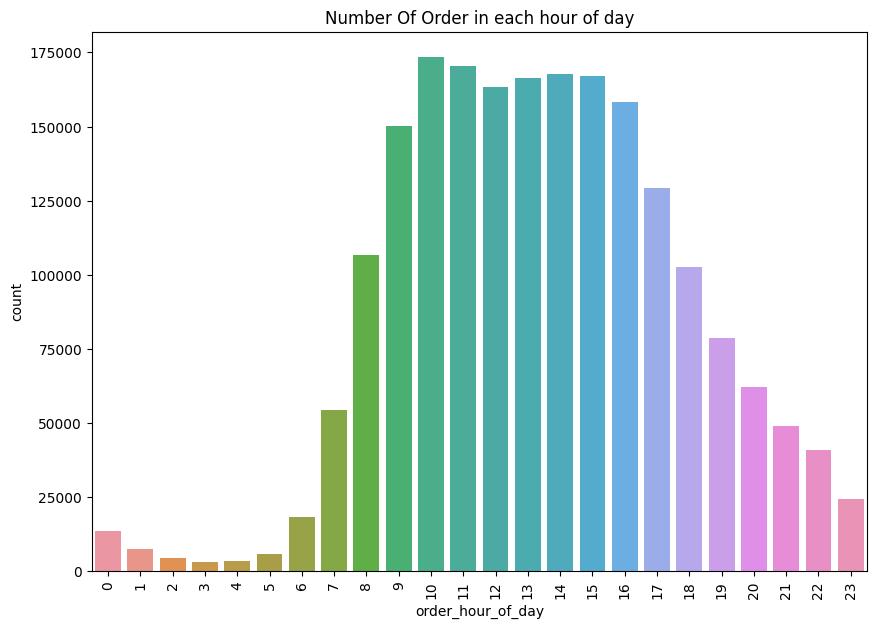

In [37]:
plt.figure(figsize=(10, 7))
sns.countplot(x=sup_imputed['order_hour_of_day'])
plt.title('Number Of Order in each hour of day')
plt.xticks(rotation=90)
plt.show()

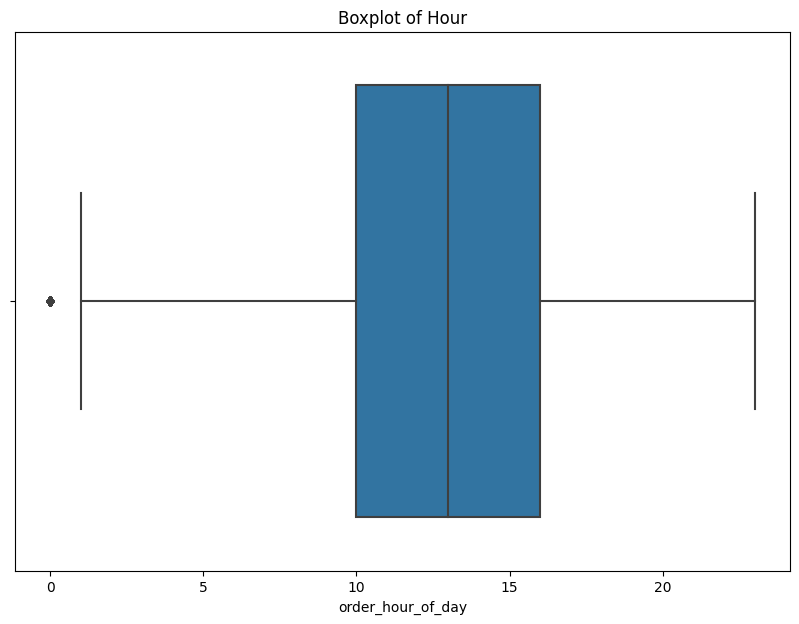

In [38]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=sup_imputed['order_hour_of_day']), plt.title('Boxplot of Hour')
plt.show()

### Conclusion for Order Hour Of Day Analysis
According to the Count plot and Box plot, We see that most of the orders were between 9 and 17 hours.

#### Days Since Prior Order

In [39]:
sup_imputed['days_since_prior_order'].describe()

count    2.019501e+06
mean     1.157427e+01
std      8.722533e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [40]:
sup_imputed['days_since_prior_order'].value_counts()

days_since_prior_order
7     214126
30    210814
6     155685
14    136329
5     129089
4     126250
8     118722
3     113263
15     89489
2      88737
9      75120
10     62073
1      59200
13     52212
11     51476
12     48171
16     31884
21     28359
0      27673
17     24103
20     23234
18     22794
19     20150
22     19950
28     16459
23     13779
24     12833
27     12804
25     11832
29     11590
26     11301
Name: count, dtype: int64

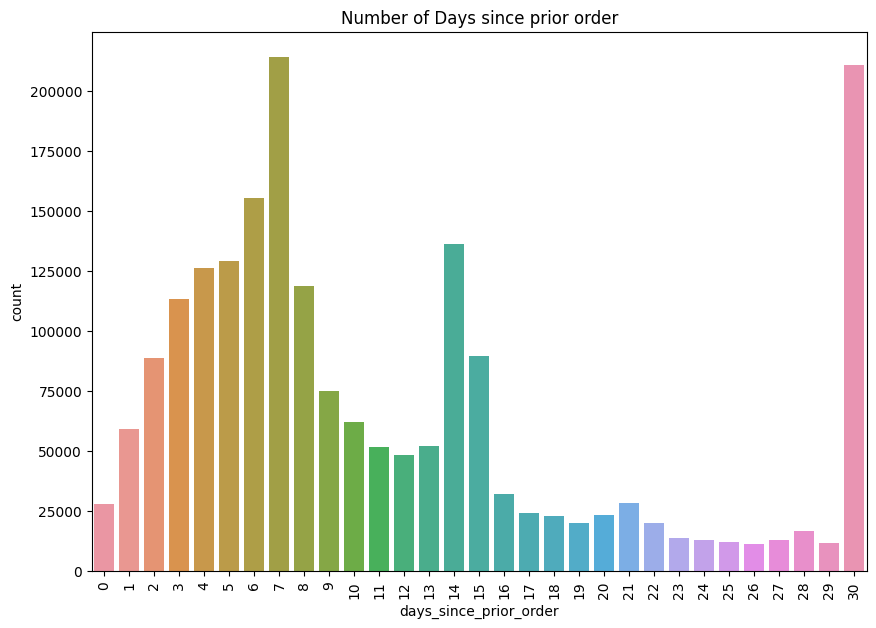

In [41]:
plt.figure(figsize=(10, 7))
sns.countplot(x=sup_imputed['days_since_prior_order'])
plt.title('Number of Days since prior order')
plt.xticks(rotation=90)
plt.show()

#### Add To Cart Order

In [42]:
sup_imputed['add_to_cart_order'].describe()

count    2.019501e+06
mean     8.363173e+00
std      7.150059e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      1.370000e+02
Name: add_to_cart_order, dtype: float64

In [43]:
sup_imputed['add_to_cart_order'].value_counts()

add_to_cart_order
1      200000
2      190134
3      178480
4      165743
5      151983
        ...  
113         1
112         1
111         1
110         1
137         1
Name: count, Length: 137, dtype: int64

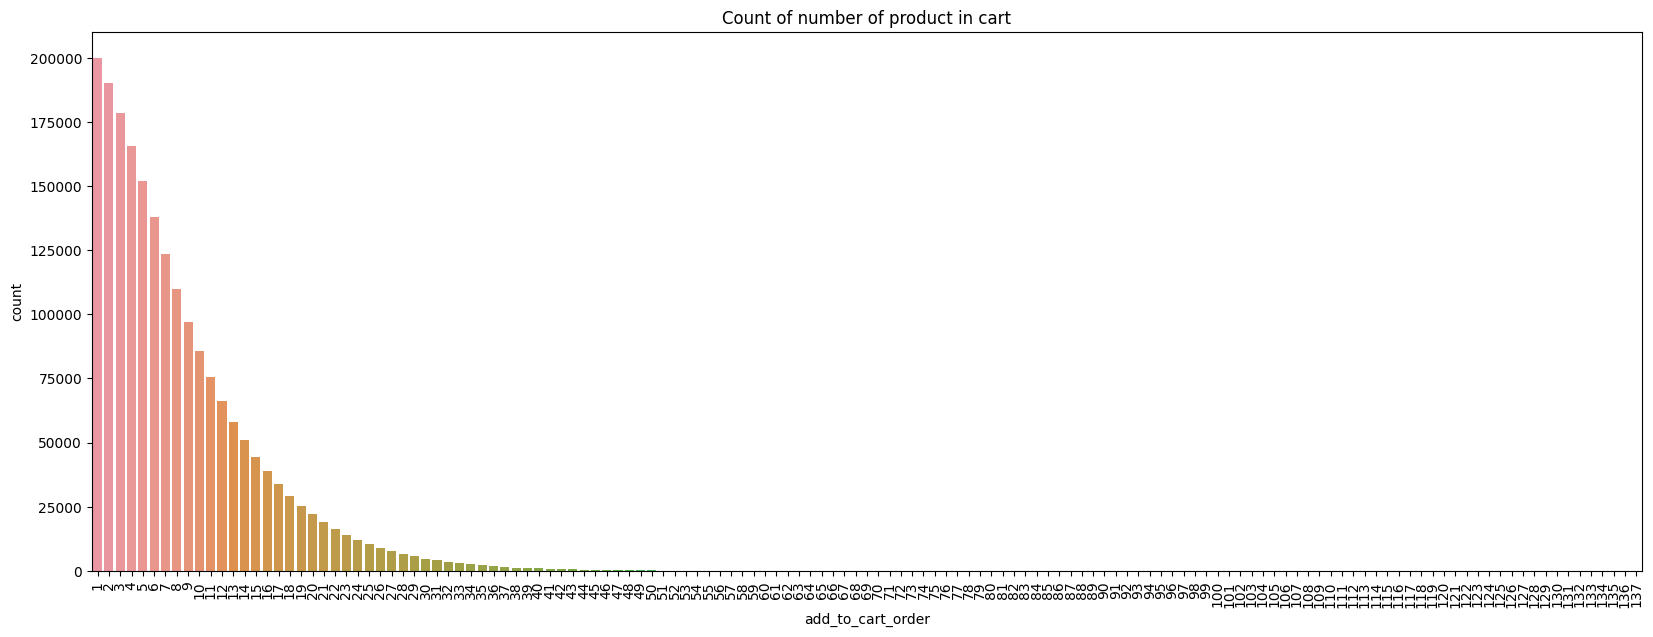

In [44]:
plt.figure(figsize=(20, 7))
sns.countplot(x=sup_imputed['add_to_cart_order'])
plt.title('Count of number of product in cart')
plt.xticks(rotation=90)
plt.show()

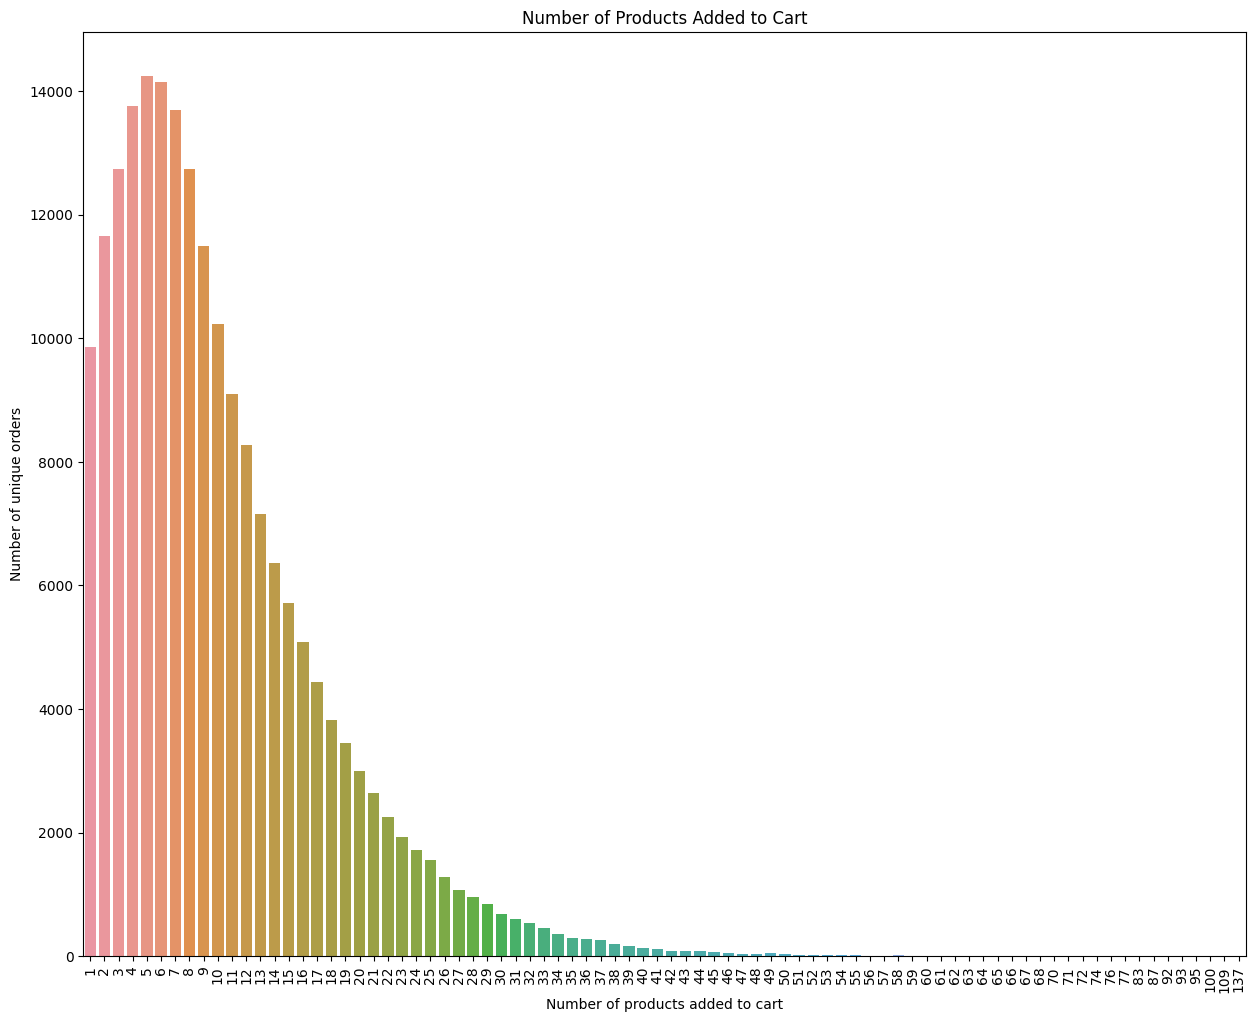

In [45]:
addtocart = sup_imputed.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
addtocart = addtocart.add_to_cart_order.value_counts()

f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=addtocart.index, y=addtocart.values, ax=ax)
plt.xticks(rotation='vertical')
plt.xlabel('Number of products added to cart')
plt.ylabel('Number of unique orders')
plt.title('Number of Products Added to Cart')
plt.show()

### Conclusion for Add To Cart Order Analysis
According to the plot and its description, we can see that in almost 75% of the orders, the number of items in the shopping cart was between 1 and 11.

#### Reordered

In [46]:
sup_imputed['reordered'].value_counts()

reordered
1    1190986
0     828515
Name: count, dtype: int64

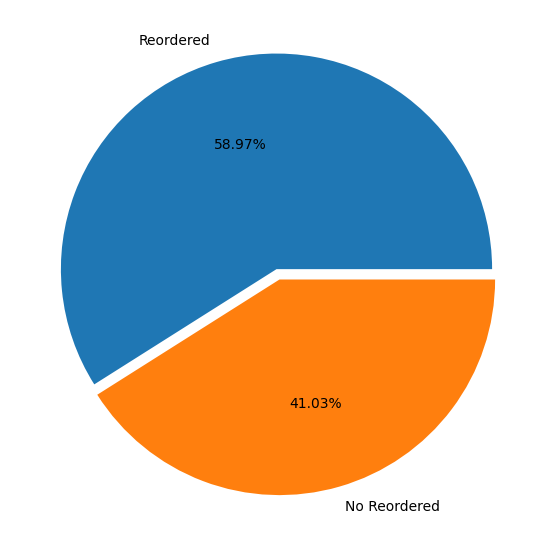

In [47]:
plt.figure(figsize=(10, 7))
labels = ['Reordered', 'No Reordered']
plt.pie(sup_imputed['reordered'].value_counts(), explode=[0.05, 0], labels=labels, autopct='%.2f%%')
plt.show()

### Conclusion for Reordered Analysis
Almost 59% of purchases have been re-ordered

#### Department

In [48]:
sup_imputed['department'].describe()

count     2019501
unique         21
top       produce
freq       588996
Name: department, dtype: object

In [49]:
sup_imputed['department'].value_counts()

department
produce            588996
dairy eggs         336915
snacks             180692
beverages          168126
frozen             139536
pantry             116262
bakery              72983
canned goods        66053
deli                65176
dry goods pasta     54054
household           46446
breakfast           44605
meat seafood        44271
personal care       28134
babies              25940
international       16738
alcohol              9439
pets                 6013
missing              4749
other                2240
bulk                 2133
Name: count, dtype: int64

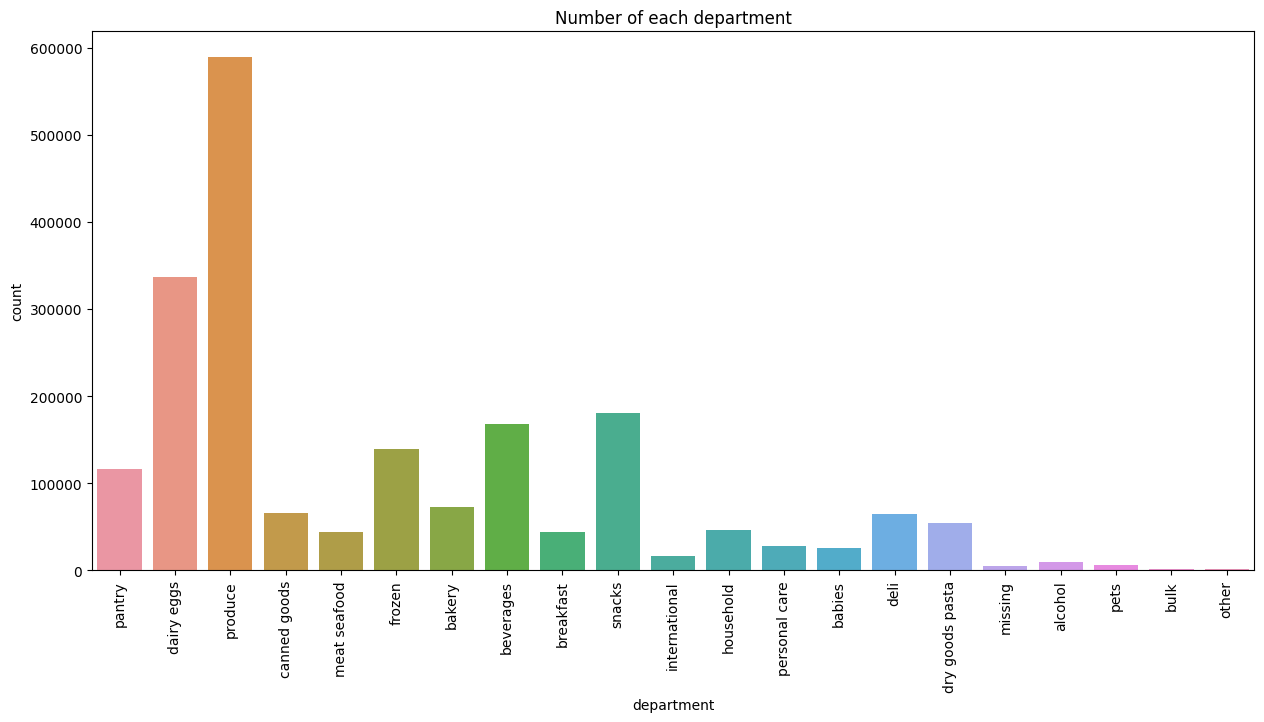

In [50]:
plt.figure(figsize=(15, 7))
sns.countplot(x=sup_imputed['department'])
plt.title('Number of each department')
plt.xticks(rotation=90)
plt.show()

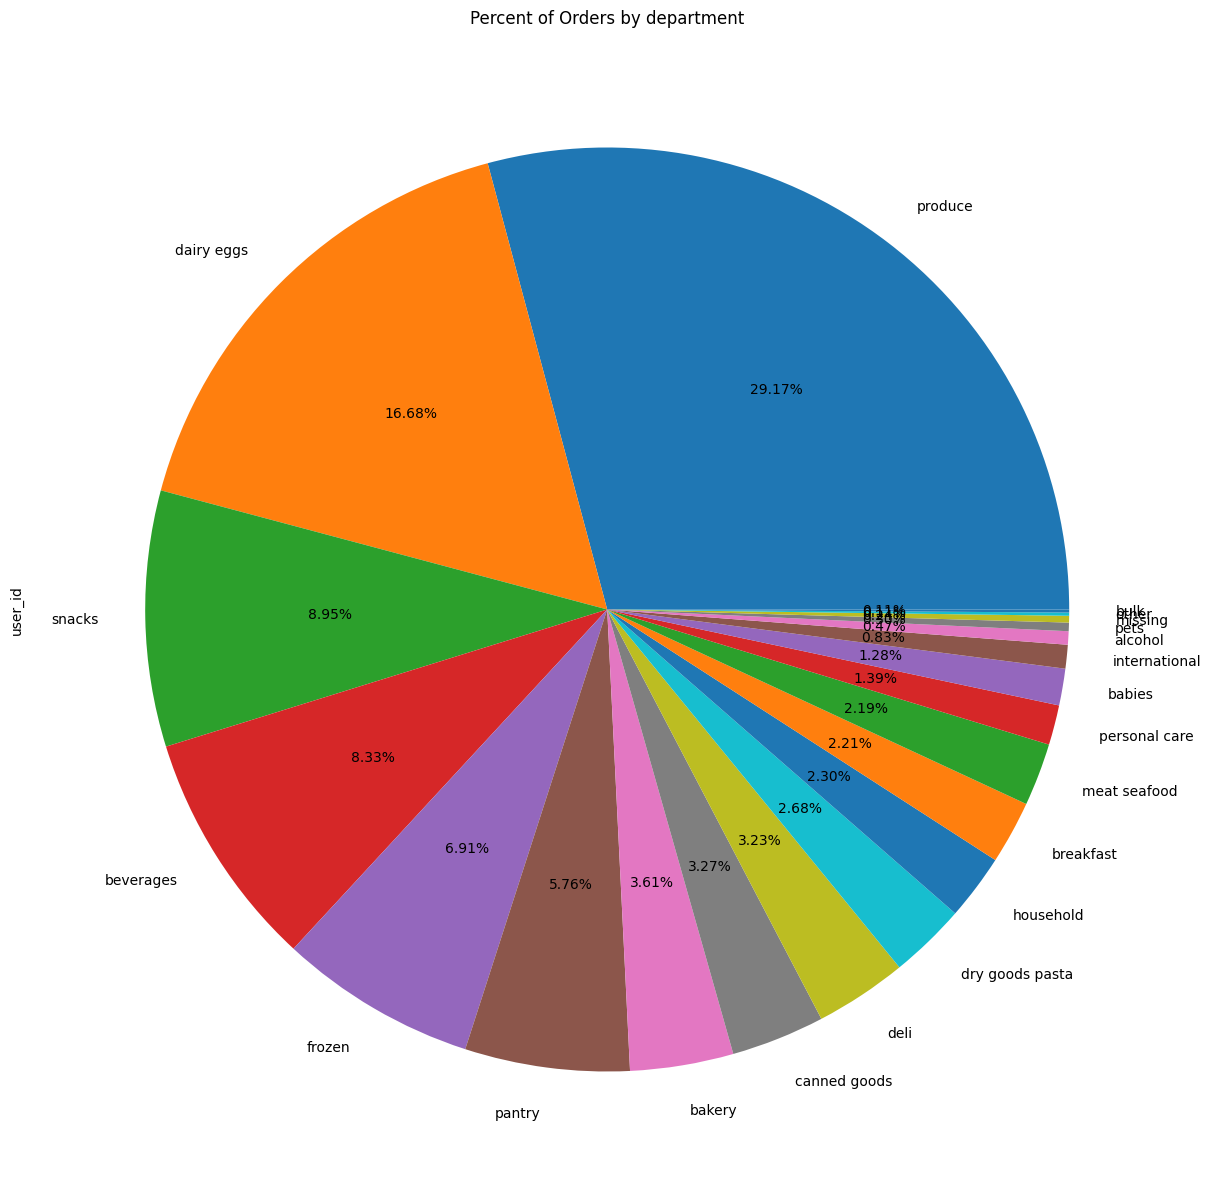

In [51]:
orders_by_dep = sup_imputed.groupby('department')['user_id'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 15))
orders_by_dep.plot(kind='pie', autopct='%1.2f%%', title='Percent of Orders by department', ax=ax)
plt.show()

### Conclusion for Department Analysis
Top 2 Department is :
* produce
* dairy eggs

#### Product Name

In [52]:
sup_imputed['product_name'].describe()

count          2019501
unique             134
top       fresh fruits
freq            226039
Name: product_name, dtype: object

In [53]:
sup_imputed['product_name'].value_counts()

product_name
fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                           387
frozen juice                     279
Name: count, Length: 134, dtype: int64

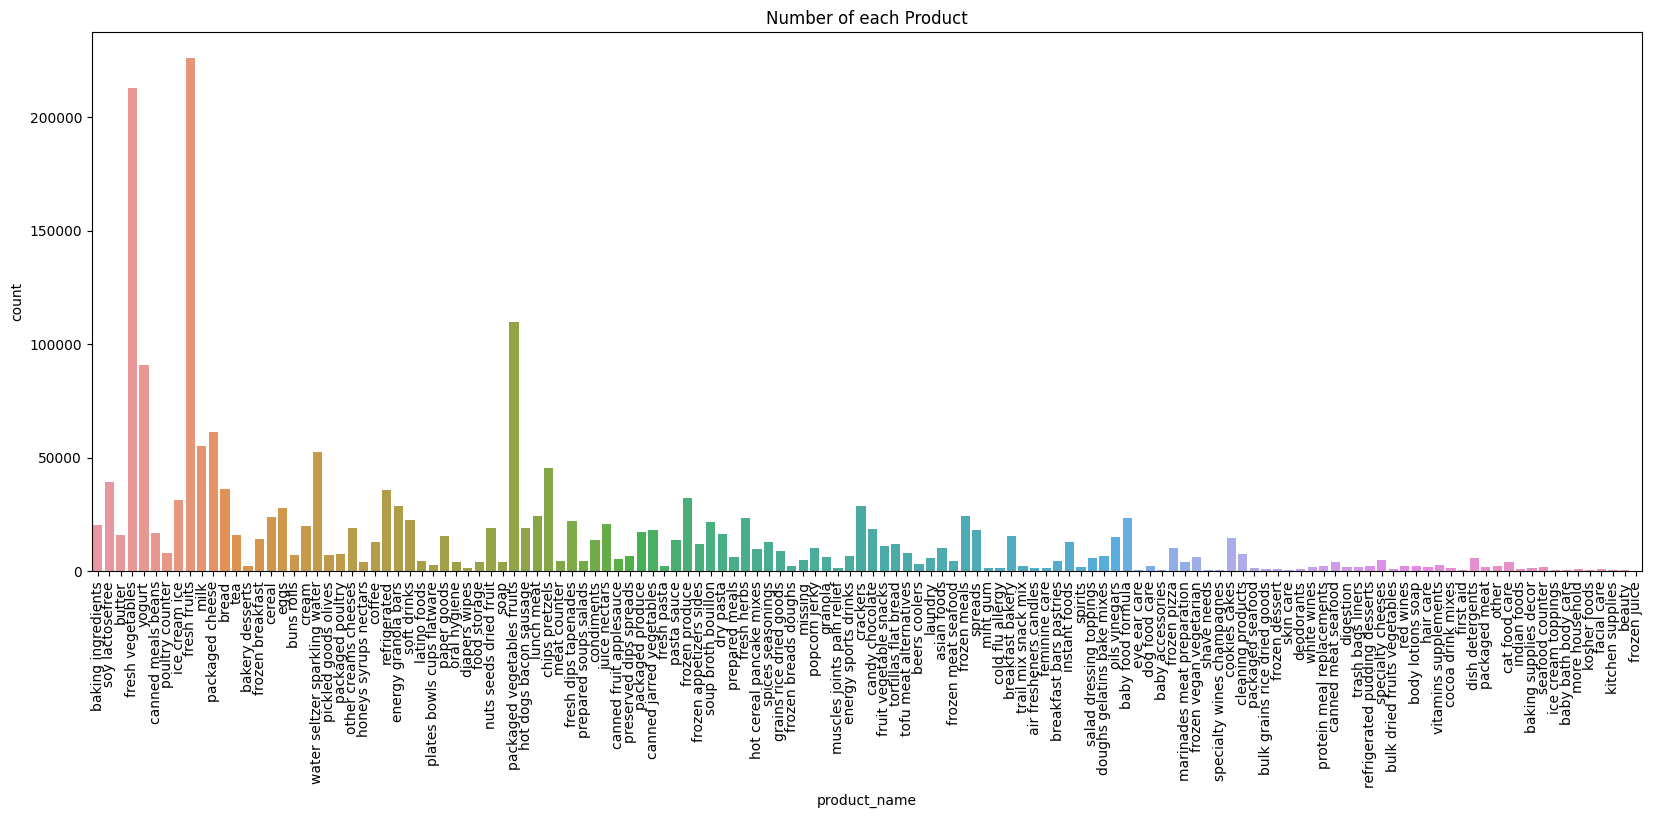

In [54]:
plt.figure(figsize=(20, 7))
sns.countplot(x=sup_imputed['product_name'])
plt.title('Number of each Product')
plt.xticks(rotation=90)
plt.show()

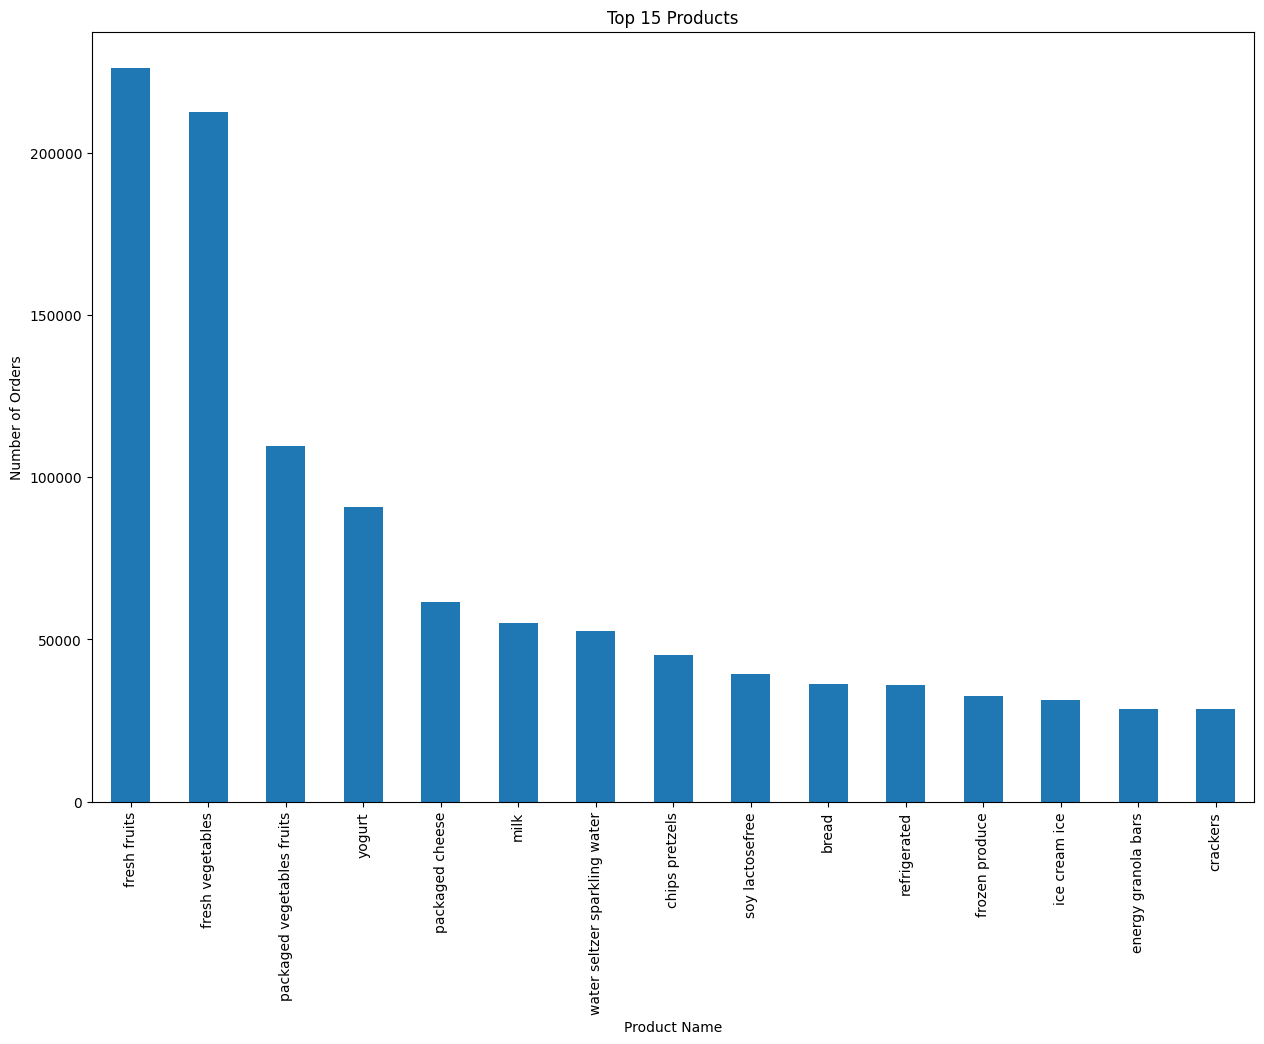

In [55]:
top_products = sup_imputed.groupby('product_name')['user_id'].count().sort_values(ascending=False).head(15)
ax = top_products.plot(kind='bar', title='Top 15 Products', figsize=(15, 10))
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.show()

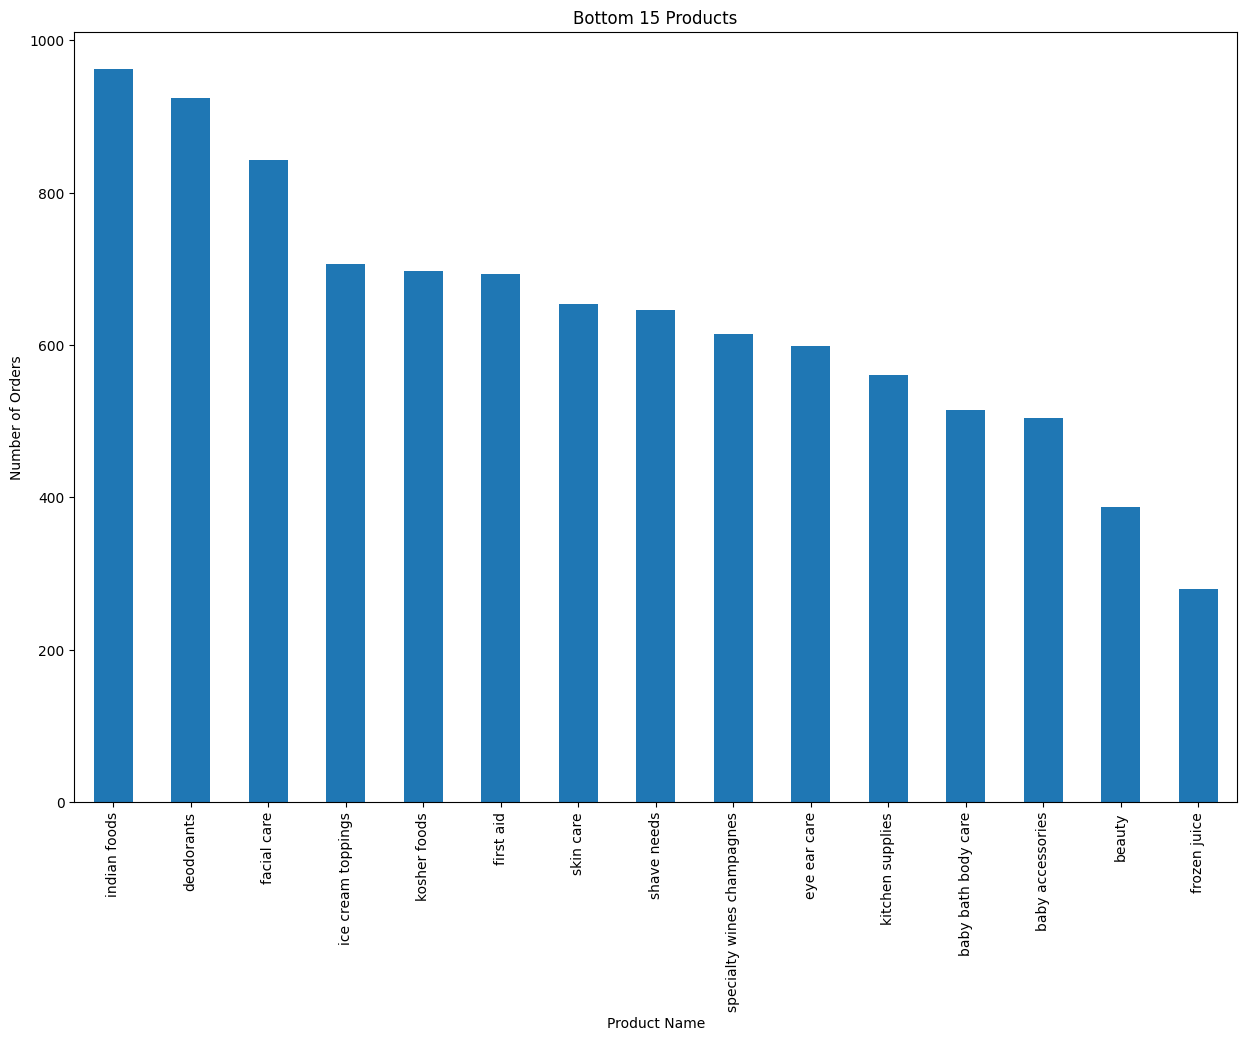

In [56]:
bottom_products = sup_imputed.groupby('product_name')['user_id'].count().sort_values(ascending=False).tail(15)
ax = bottom_products.plot(kind='bar', title='Bottom 15 Products', figsize=(15, 10))
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.show()

### Conclusion for Product Name Analysis
Top 3 Product:
* fresh fruits
* fresh vegetables
* packaged vegetables fruits

Bottom 3 Product:
* forzen juice
* beauty
* baby accessories

#### Other Analysis

In [57]:
def order_part_of_day(order):
    if order in range(6, 12):
        return 'morning'
    elif order in range(12, 18):
        return 'afternoon'
    elif order in range(18, 22):
        return 'evening'
    else:
        return 'night'

In [58]:
sup_imputed['order_part_of_day'] = sup_imputed['order_hour_of_day'].apply(order_part_of_day)
sup_imputed

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                            14          17                  1          0   
1                            14          91                  2          0   
2                            14          36                  3          0   
3                            14          83                  4          0   
4                            14          83                  5          0   
...                         ...         ...                ...        ...   
2019496                       5          83                  8          0   
2019497                       3         115                  1          1   
2019498                       3          32                  2          1   
2019499                       3          32                  3          1   
2019500                       3         123                  4          1   

         department_id  department                   product_name  \
0                   13      pantry             baking ingredients   
1                   16  dairy eggs                soy lactosefree   
2                   16  dairy eggs                         butter   
3                    4     produce               fresh vegetables   
4                    4     produce               fresh vegetables   
...                ...         ...                            ...   
2019496              4     produce               fresh vegetables   
2019497              7   beverages  water seltzer sparkling water   
2019498              4     produce               packaged produce   
2019499              4     produce               packaged produce   
2019500              4     produce     packaged vegetables fruits   

        order_part_of_day  
0                 evening  
1                 evening  
2                 evening  
3                 evening  
4                 evening  
...                   ...  
2019496           evening  
2019497           evening  
2019498           evening  
2019499           evening  
2019500           evening  

[2019501 rows x 13 columns]

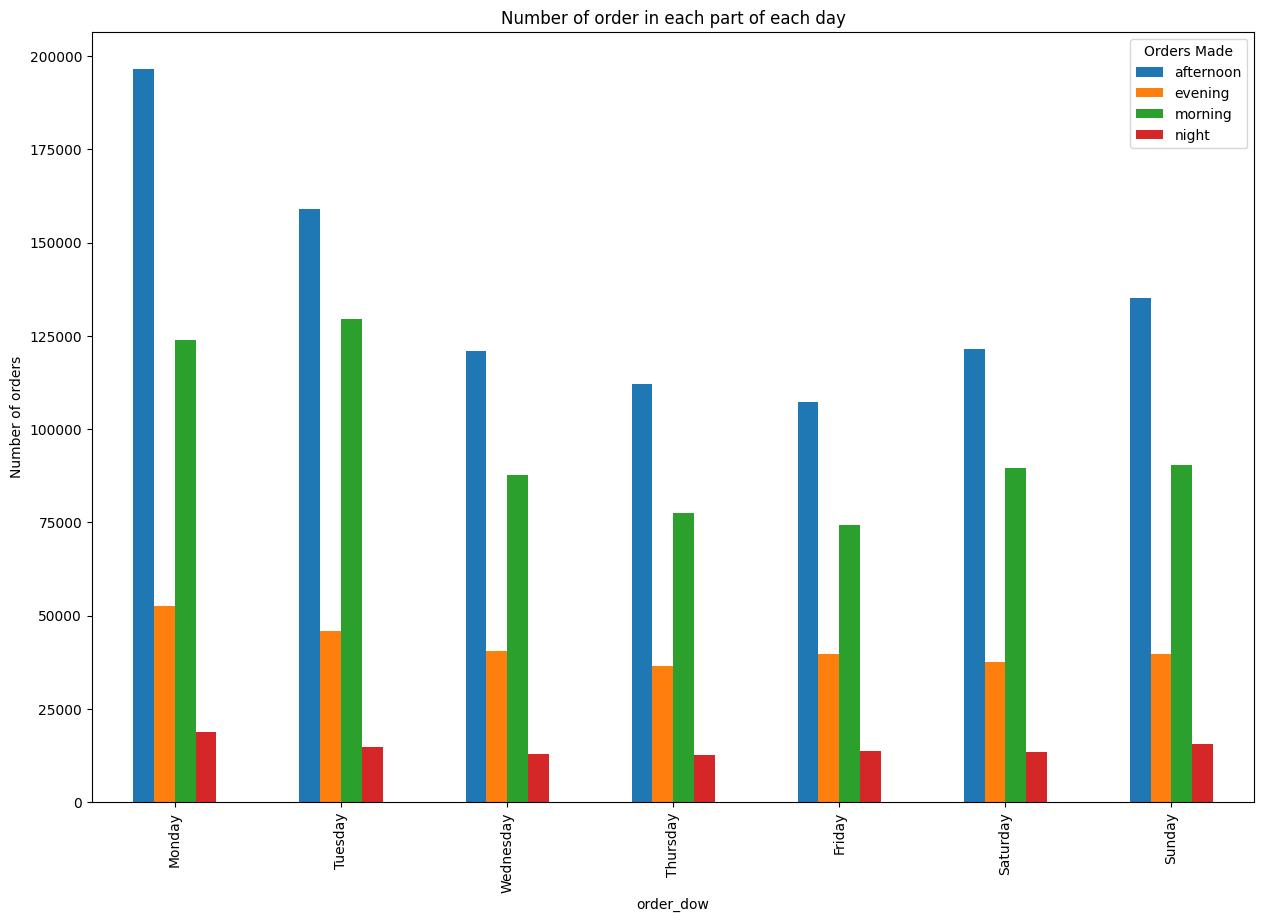

In [59]:
orders_by_day_time = sup_imputed.pivot_table(index='order_dow', columns='order_part_of_day', values='user_id', aggfunc='count')

ax = orders_by_day_time.plot(kind='bar', figsize=(15, 10))
ax.set_title('Number of order in each part of each day')
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
ax.set_ylabel('Number of orders')
ax.legend(title='Orders Made')
plt.show()

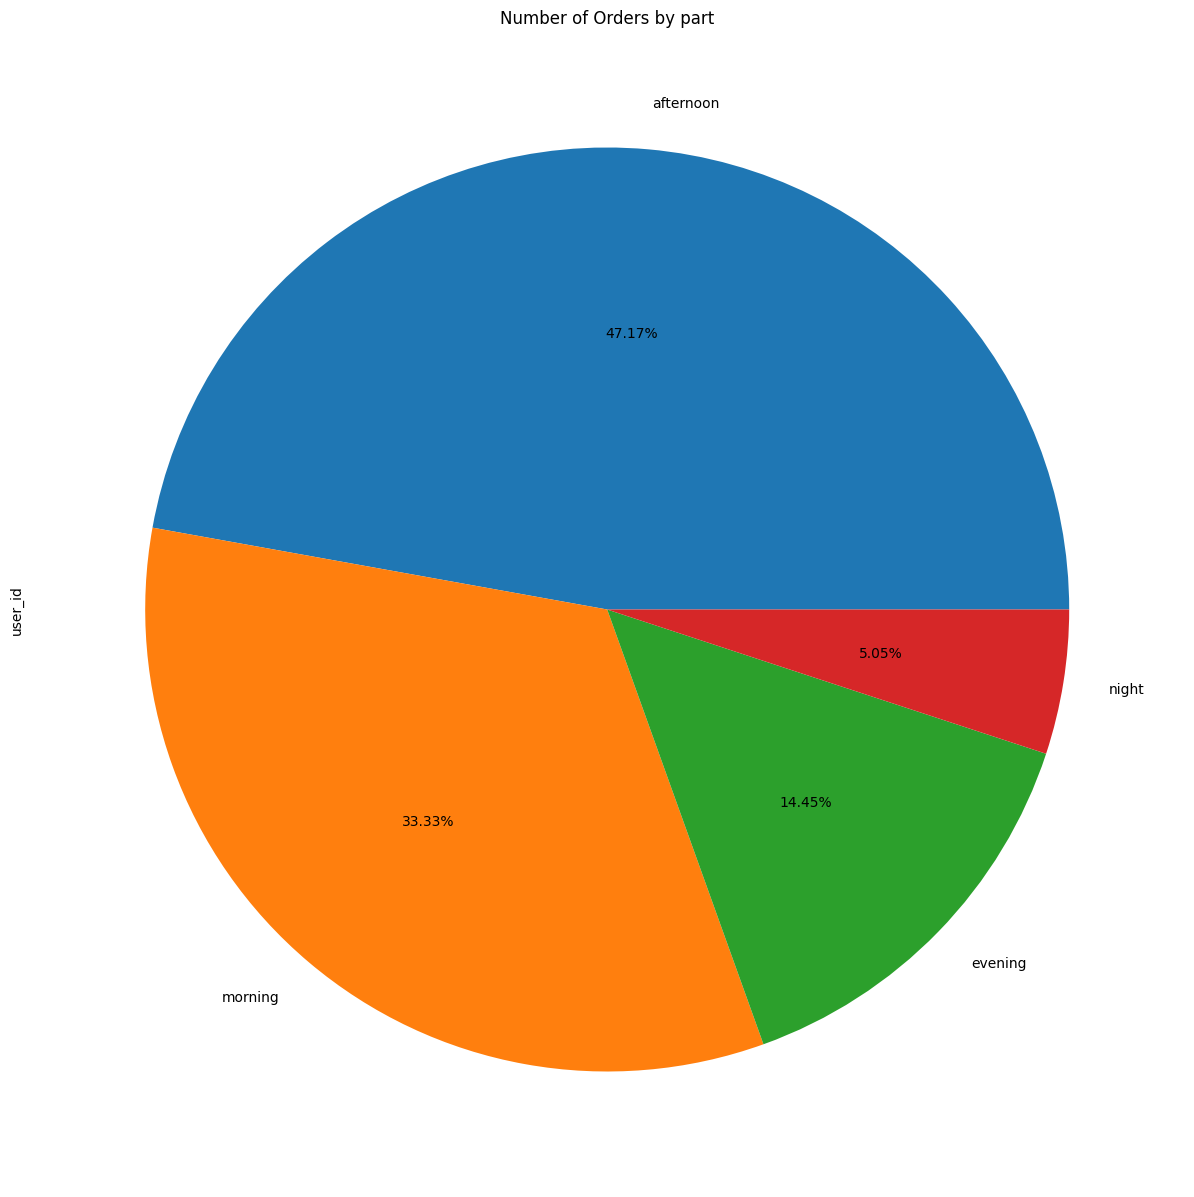

In [60]:
orders_by_part = sup_imputed.groupby('order_part_of_day')['user_id'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 15))
orders_by_part.plot(kind='pie', autopct='%1.2f%%', title='Number of Orders by part', ax=ax)

plt.show()

In [61]:
def order_number_range(number_order):
    ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50),(51, 60),(61, 70),(71, 80),(81, 90),(91, 100)]
    for i in ranges:
        if number_order in range(i[0], i[1] + 1):
            return f'{i[0]}-{i[1]}'
    return '+100'

In [62]:
sup_imputed['order_number_range'] = sup_imputed['order_number'].apply(order_number_range)
sup_imputed

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                            14          17                  1          0   
1                            14          91                  2          0   
2                            14          36                  3          0   
3                            14          83                  4          0   
4                            14          83                  5          0   
...                         ...         ...                ...        ...   
2019496                       5          83                  8          0   
2019497                       3         115                  1          1   
2019498                       3          32                  2          1   
2019499                       3          32                  3          1   
2019500                       3         123                  4          1   

         department_id  department                   product_name  \
0                   13      pantry             baking ingredients   
1                   16  dairy eggs                soy lactosefree   
2                   16  dairy eggs                         butter   
3                    4     produce               fresh vegetables   
4                    4     produce               fresh vegetables   
...                ...         ...                            ...   
2019496              4     produce               fresh vegetables   
2019497              7   beverages  water seltzer sparkling water   
2019498              4     produce               packaged produce   
2019499              4     produce               packaged produce   
2019500              4     produce     packaged vegetables fruits   

        order_part_of_day order_number_range  
0                 evening               1-10  
1                 evening               1-10  
2                 evening               1-10  
3                 evening               1-10  
4                 evening               1-10  
...                   ...                ...  
2019496           evening              11-20  
2019497           evening              41-50  
2019498           evening              41-50  
2019499           evening              41-50  
2019500           evening              41-50  

[2019501 rows x 14 columns]

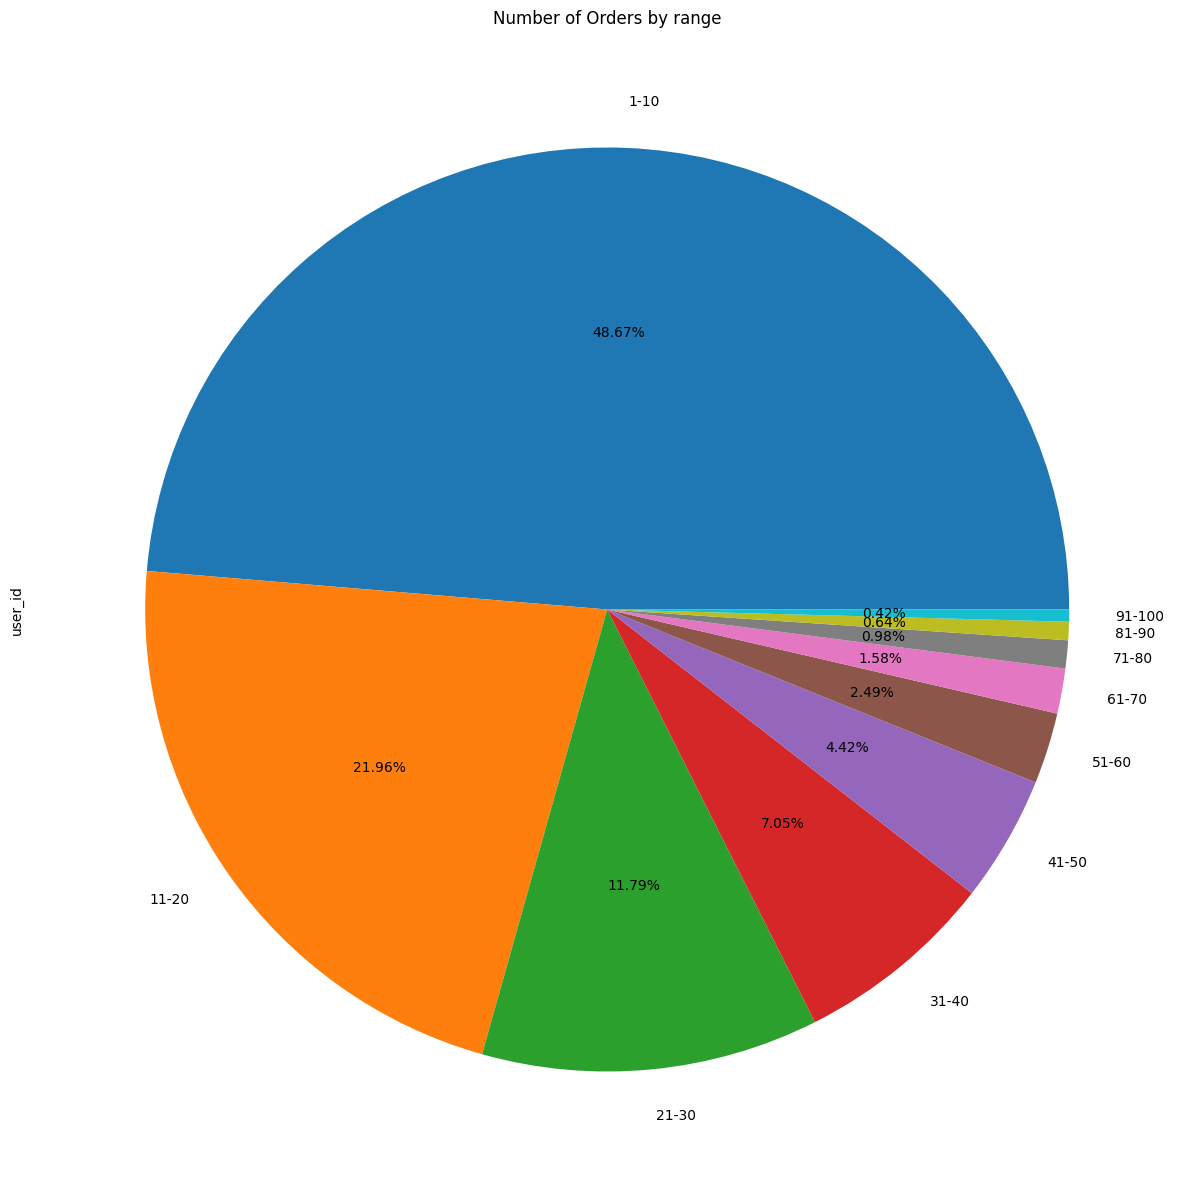

In [63]:
orders_by_range = sup_imputed.groupby('order_number_range')['user_id'].count().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 15))
orders_by_range.plot(kind='pie', autopct='%1.2f%%', title='Number of Orders by range', ax=ax)

plt.show()

### Conclusion for Other Analysis
Almost 80% of the orders were in the morning and afternoon.<br>
Top 3 range of order number:
* 1-10 , 48.67%
* 11-20 , 21.96%
* 21-30 , 11.79%

#### Data Preprocessing

In [65]:
corr_mat = sup_imputed.iloc[:, :-4].corr()
corr_mat

order_id   user_id  order_number  order_dow  \
order_id                1.000000  0.000515      0.004791   0.002015   
user_id                 0.000515  1.000000     -0.003244  -0.001796   
order_number            0.004791 -0.003244      1.000000   0.013848   
order_dow               0.002015 -0.001796      0.013848   1.000000   
order_hour_of_day       0.001039 -0.002050     -0.038352   0.010854   
days_since_prior_order -0.001831  0.000053     -0.370478  -0.030884   
product_id              0.000114  0.000300      0.000227  -0.001458   
add_to_cart_order      -0.003230  0.001180     -0.000380  -0.009274   
reordered               0.002207 -0.001780      0.302881  -0.008689   
department_id           0.000691  0.001475      0.001811   0.003504   

                        order_hour_of_day  days_since_prior_order  product_id  \
order_id                         0.001039               -0.001831    0.000114   
user_id                         -0.002050                0.000053    0.000300   
order_number                    -0.038352               -0.370478    0.000227   
order_dow                        0.010854               -0.030884   -0.001458   
order_hour_of_day                1.000000                0.005699   -0.000077   
days_since_prior_order           0.005699                1.000000    0.006262   
product_id                      -0.000077                0.006262    1.000000   
add_to_cart_order               -0.015119                0.051123    0.008186   
reordered                       -0.019492               -0.155163    0.004256   
department_id                   -0.007886                0.000361    0.062107   

                        add_to_cart_order  reordered  department_id  
order_id                        -0.003230   0.002207       0.000691  
user_id                          0.001180  -0.001780       0.001475  
order_number                    -0.000380   0.302881       0.001811  
order_dow                       -0.009274  -0.008689       0.003504  
order_hour_of_day               -0.015119  -0.019492      -0.007886  
days_since_prior_order           0.051123  -0.155163       0.000361  
product_id                       0.008186   0.004256       0.062107  
add_to_cart_order                1.000000  -0.133566       0.029746  
reordered                       -0.133566   1.000000      -0.037645  
department_id                    0.029746  -0.037645       1.000000

<Axes: >

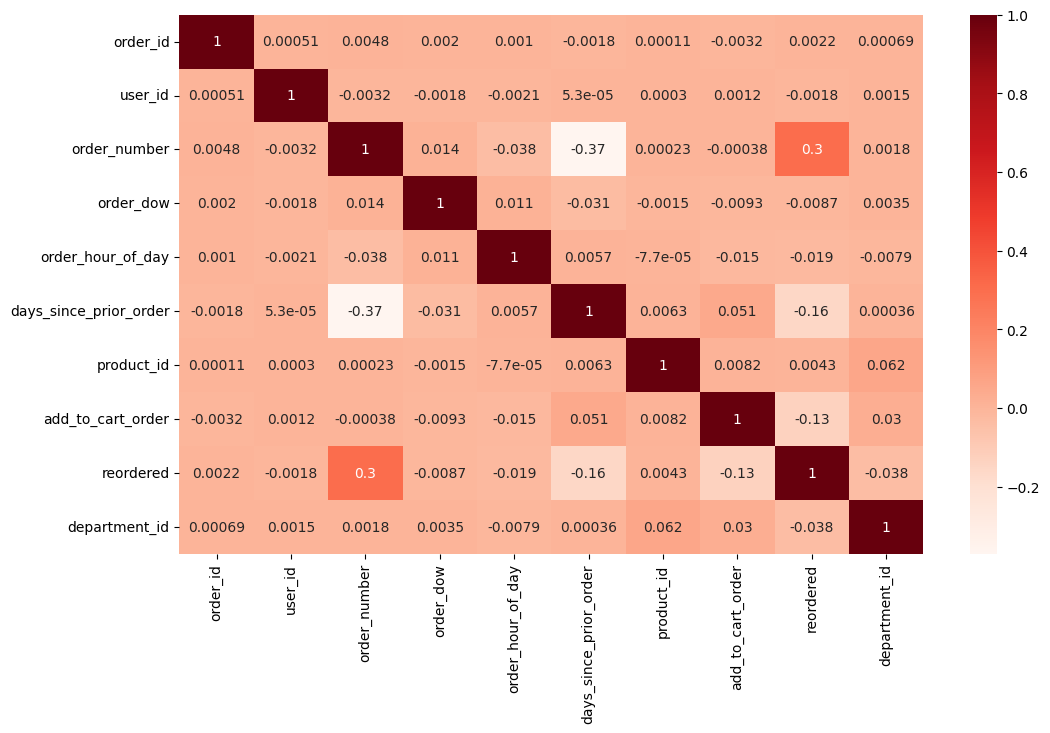

In [67]:
plt.figure(figsize=(12, 7))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

In [68]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, SpectralClustering
from sklearn.decomposition import PCA, KernelPCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.manifold import TSNE

In [149]:
X = sup_copy.iloc[:, :-2]

In [150]:
X

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2425083    49125             1          2                 18   
1         2425083    49125             1          2                 18   
2         2425083    49125             1          2                 18   
3         2425083    49125             1          2                 18   
4         2425083    49125             1          2                 18   
...           ...      ...           ...        ...                ...   
2019496   3390742   199430            16          3                 18   
2019497    458285   128787            42          2                 19   
2019498    458285   128787            42          2                 19   
2019499    458285   128787            42          2                 19   
2019500    458285   128787            42          2                 19   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                            14          17                  1          0   
1                            14          91                  2          0   
2                            14          36                  3          0   
3                            14          83                  4          0   
4                            14          83                  5          0   
...                         ...         ...                ...        ...   
2019496                       5          83                  8          0   
2019497                       3         115                  1          1   
2019498                       3          32                  2          1   
2019499                       3          32                  3          1   
2019500                       3         123                  4          1   

         department_id  
0                   13  
1                   16  
2                   16  
3                    4  
4                    4  
...                ...  
2019496              4  
2019497              7  
2019498              4  
2019499              4  
2019500              4  

[2019501 rows x 10 columns]

#### Trimming Outlier

In [85]:
def percentile_trimming_outlier(data):
    drop_outliers = np.array([])
    for col in data.columns:
        upper_bound = data[col].quantile(0.99)
        lower_bound = data[col].quantile(0.01)

        df = data[col]
        indices = df[(df < lower_bound) | (df > upper_bound)].index
        drop_outliers = np.append(drop_outliers, indices)
    return drop_outliers

In [151]:
drop = percentile_trimming_outlier(X)
dropped = np.unique(drop)
X.drop(dropped, inplace=True)
X.shape

(1859623, 10)

In [267]:
x_sample = X.sample(50000, random_state=42)

### KMeans

In [268]:
k_means = KMeans(n_init='auto')

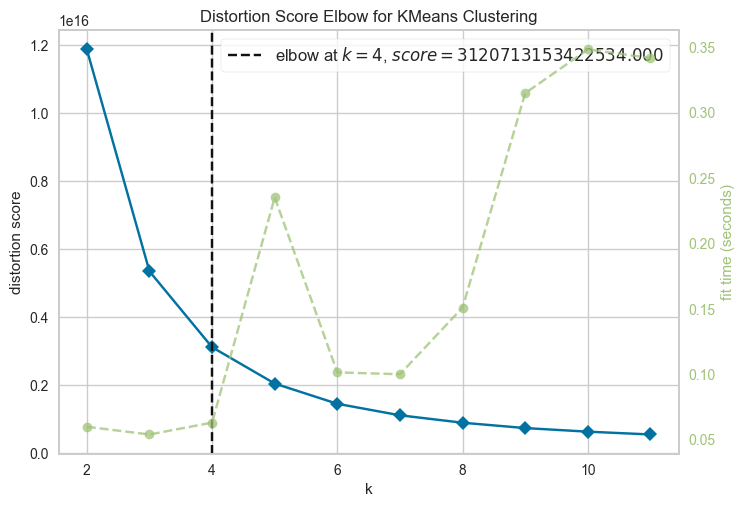

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [269]:
visualizer = KElbowVisualizer(k_means, k=(2, 12))
visualizer.fit(x_sample)
visualizer.show()

In [270]:
k_means = KMeans(n_clusters=4, n_init='auto')

In [271]:
y_pred_kmeans = k_means.fit_predict(x_sample)
y_pred_kmeans

array([3, 0, 3, ..., 0, 0, 0], dtype=int32)

/Users/mohammad/Desktop/Projects/Clustering-SuperMarket-Dataset-For-Predictive-Marketing/.venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



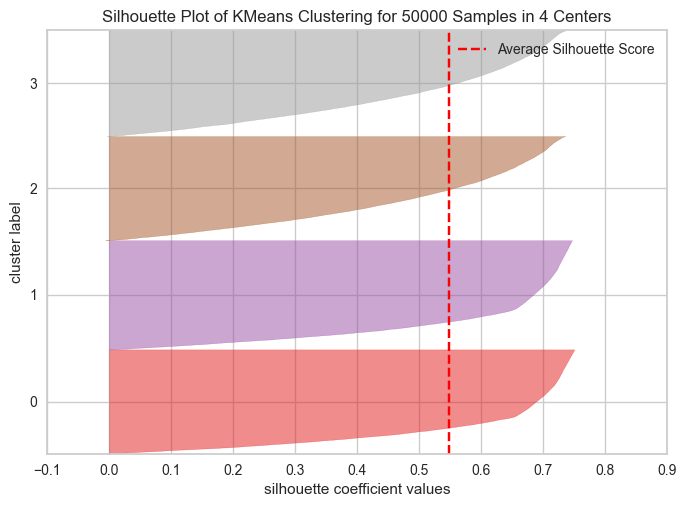

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [272]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(x_sample)
visualizer.show()

In [275]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne = tsne.fit_transform(x_sample)

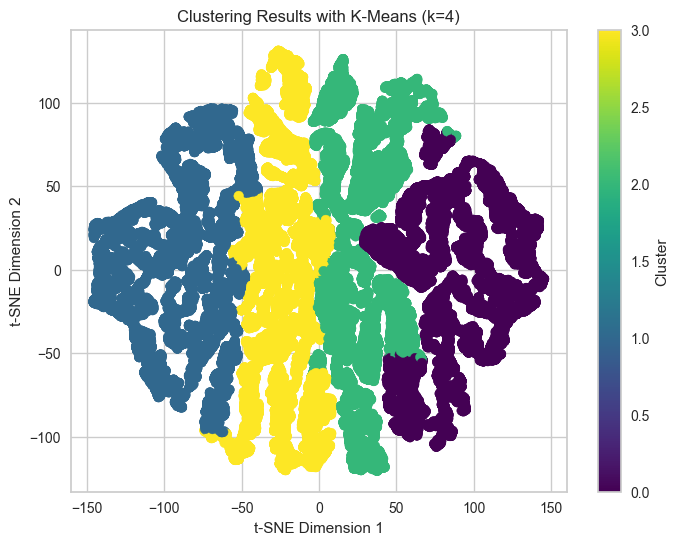

In [276]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=k_means.labels_, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with K-Means (k={})'.format(4))
plt.colorbar(label='Cluster')
plt.show()

In [277]:
tsne3d = TSNE(n_components=3, random_state=42, n_jobs=-1)
X_tsne_3d = tsne3d.fit_transform(x_sample)

In [278]:
import plotly.express as px 
import nbformat

fig = px.scatter_3d(pd.DataFrame(X_tsne_3d), x=0, y=1, z=2, color=k_means.labels_) 
fig.show()

##### Using PCA

In [767]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_sample)

In [768]:
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

Explained variance ratio (first two components): [0.996363 0.003637]


In [769]:
k_means = KMeans(n_init='auto')

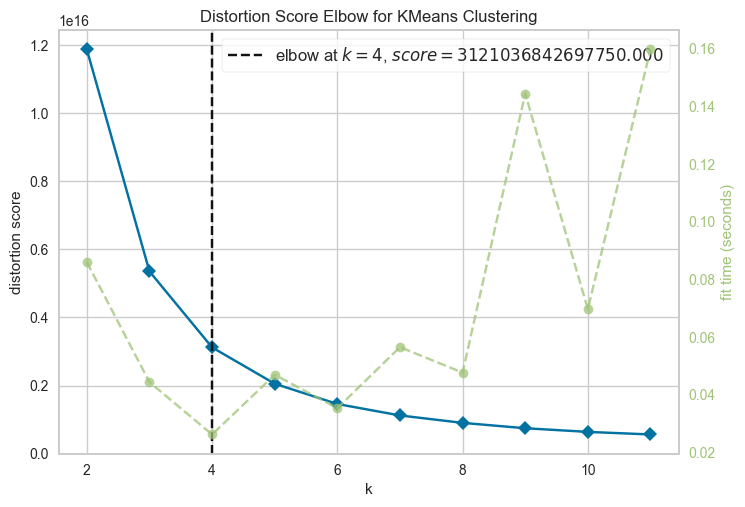

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [770]:
visualizer = KElbowVisualizer(k_means, k=(2, 12))
visualizer.fit(x_pca)
visualizer.show()

In [771]:
k_means = KMeans(n_clusters=3, n_init='auto')

In [772]:
y_pred_kmeans = k_means.fit_predict(x_pca)
y_pred_kmeans

array([2, 1, 0, ..., 1, 1, 1], dtype=int32)

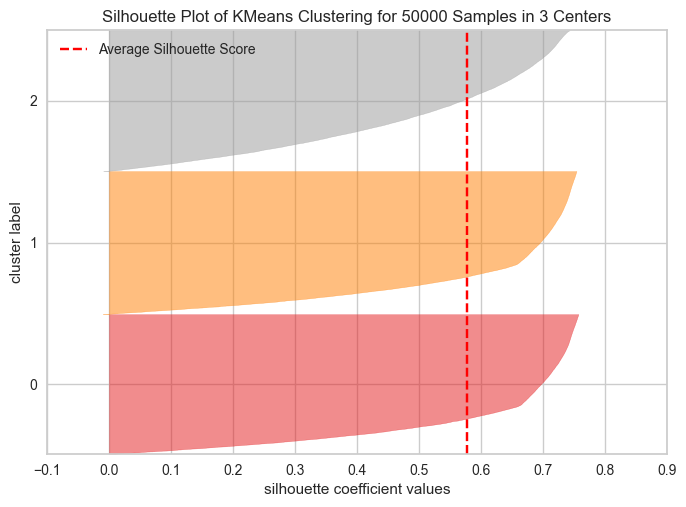

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [773]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(x_pca)
visualizer.show()

In [774]:
tsne_pca = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne_pca = tsne_pca.fit_transform(x_pca)

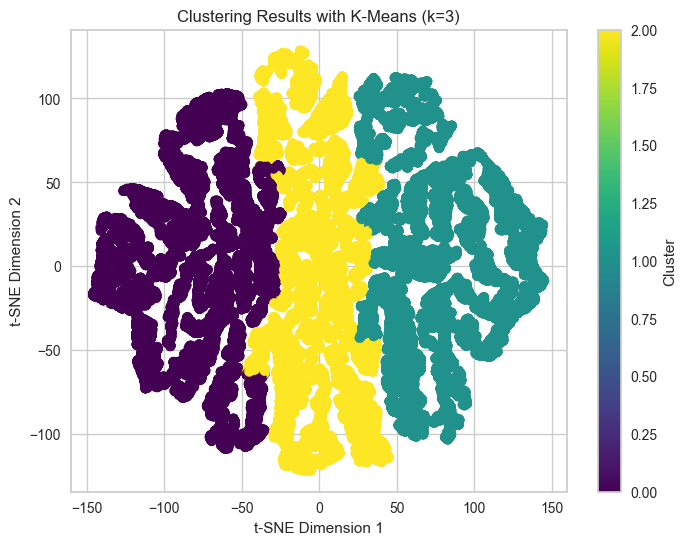

In [775]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], c=k_means.labels_, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with K-Means (k={})'.format(3))
plt.colorbar(label='Cluster')
plt.show()

#### Using Kernel PCA

In [776]:
x_sample_ker = X.sample(20000, random_state=42)
x_sample_ker = MinMaxScaler().fit_transform(x_sample_ker)
pca = KernelPCA(n_components=2, kernel='poly', degree=3, random_state=42, n_jobs=-1)
x_pca = pca.fit_transform(x_sample_ker)

In [777]:
k_means = KMeans(n_init='auto')

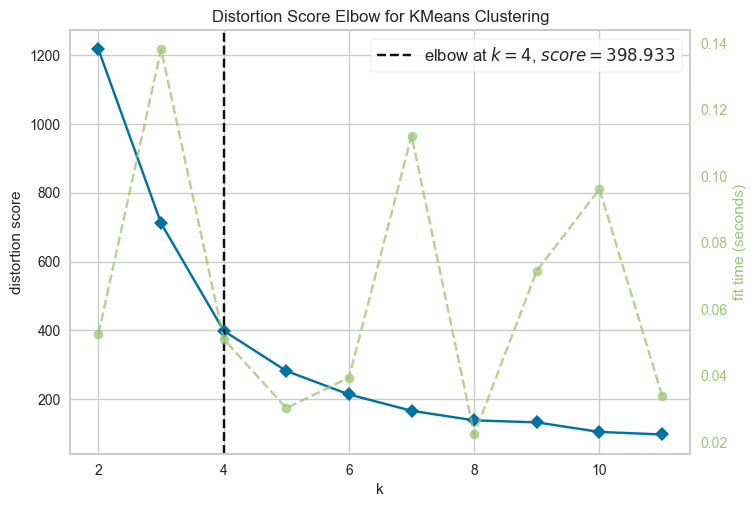

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [778]:
visualizer = KElbowVisualizer(k_means, k=(2, 12))
visualizer.fit(x_pca)
visualizer.show()

In [779]:
k_means = KMeans(n_clusters=2, n_init='auto')

In [780]:
y_pred_kmeans = k_means.fit_predict(x_pca)
y_pred_kmeans

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

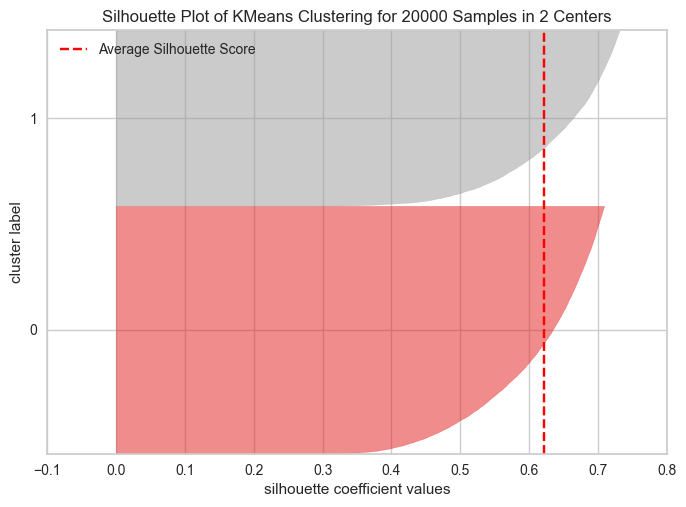

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 20000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [781]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(x_pca)
visualizer.show()

In [782]:
tsne_pca_ker = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne_pca_ker = tsne_pca_ker.fit_transform(x_pca)

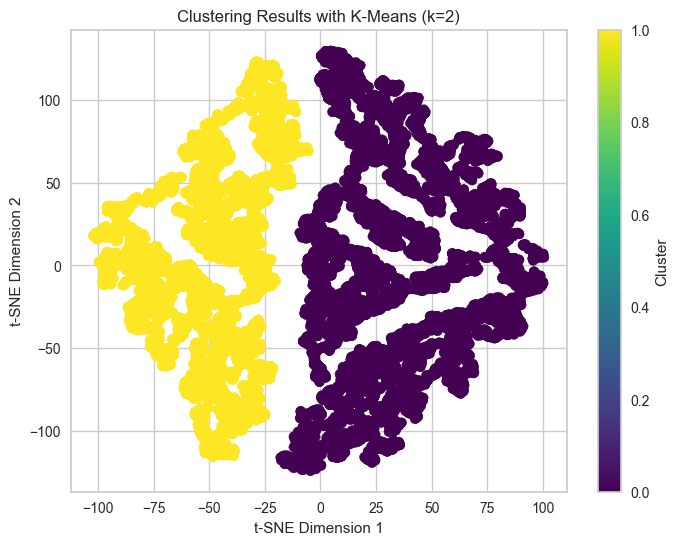

In [785]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_pca_ker[:, 0], X_tsne_pca_ker[:, 1], c=k_means.labels_, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with K-Means (k={})'.format(2))
plt.colorbar(label='Cluster')
plt.show()

In [786]:
x_sample_ker = X.sample(20000, random_state=42)
x_sample_ker = MinMaxScaler().fit_transform(x_sample_ker)
pca3d = KernelPCA(n_components=3, kernel='poly', degree=7, random_state=42, n_jobs=-1)
x_pca3d = pca3d.fit_transform(x_sample_ker)

In [787]:
k_means = KMeans(n_clusters=2, n_init='auto')

In [788]:
y_pred_kmeans = k_means.fit_predict(x_pca3d)
y_pred_kmeans

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

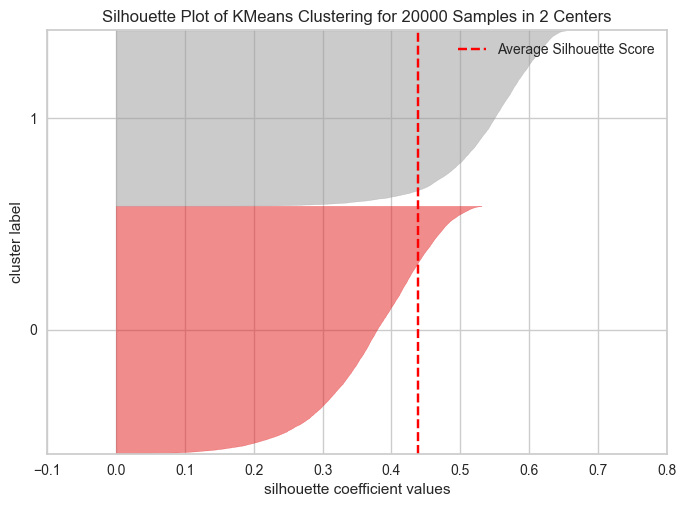

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 20000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [789]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(x_pca3d)
visualizer.show()

In [790]:
tsne_pca_ker3d = TSNE(n_components=3, random_state=42, n_jobs=-1)
X_tsne_pca_ker3d = tsne_pca_ker3d.fit_transform(x_pca3d)

In [791]:
import plotly.express as px 
import nbformat

fig = px.scatter_3d(pd.DataFrame(X_tsne_pca_ker3d), x=0, y=1, z=2, color=k_means.labels_) 
fig.show()

### DBSCAN

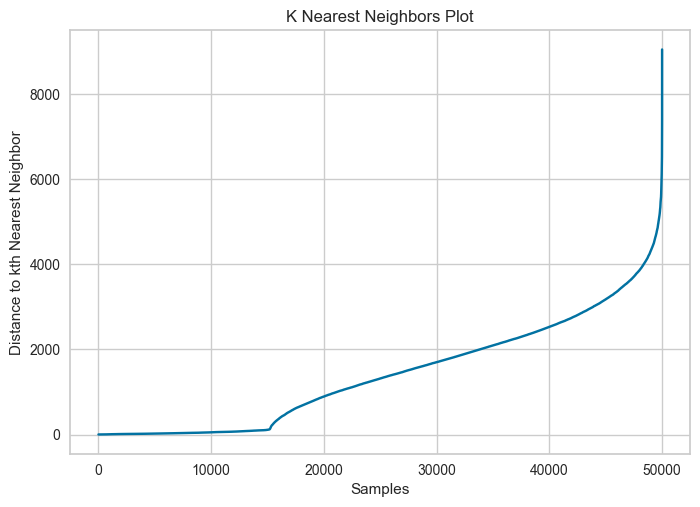

In [792]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5)
nn.fit(x_sample)
distances, _ = nn.kneighbors(x_sample)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  
plt.plot(distances)
plt.xlabel('Samples')
plt.ylabel('Distance to kth Nearest Neighbor')
plt.title('K Nearest Neighbors Plot')
plt.show()

In [793]:
db_scan = DBSCAN(eps=4000, min_samples=15, n_jobs=-1)

In [794]:
y_pred = db_scan.fit_predict(x_sample)

In [795]:
pd.DataFrame(y_pred).value_counts()

-1     49697
 2        21
 6        20
 8        20
 3        19
 0        19
 7        18
 5        17
 16       17
 4        16
 1        16
 9        16
 13       16
 15       16
 10       15
 11       15
 12       15
 14       15
 17       12
Name: count, dtype: int64

In [796]:
x_scaled = pd.DataFrame(x_sample.copy())

In [797]:
x_scaled['order_id'] = StandardScaler().fit_transform(x_scaled['order_id'].values.reshape(-1, 1))
x_scaled['user_id'] = StandardScaler().fit_transform(x_scaled['user_id'].values.reshape(-1, 1))
x_scaled['order_number'] = StandardScaler().fit_transform(x_scaled['order_number'].values.reshape(-1, 1))
x_scaled['product_id'] = StandardScaler().fit_transform(x_scaled['product_id'].values.reshape(-1, 1))
x_scaled['add_to_cart_order'] = StandardScaler().fit_transform(x_scaled['add_to_cart_order'].values.reshape(-1, 1))
x_scaled['days_since_prior_order'] = StandardScaler().fit_transform(x_scaled['days_since_prior_order'].values.reshape(-1, 1))

In [798]:
x_scaled

order_id   user_id  order_number  order_dow  order_hour_of_day  \
1932342 -0.283052 -0.589112      0.542618          1                 16   
286521   1.163417 -0.953008     -0.022057          6                 19   
109509  -0.785522  0.964203     -0.335766          2                 18   
1934951  0.037373 -0.426816      0.291651          5                 10   
1626037  0.375189 -0.356910      0.228909          4                 10   
...           ...       ...           ...        ...                ...   
987183   1.278741 -0.593685      0.542618          1                 13   
1922459 -1.653941  0.273763      0.291651          3                 11   
1783809  1.561191  0.928069     -0.586733          4                 16   
1040025  1.277248  0.714139     -0.963183          1                  7   
415944   1.511320  0.532440     -0.649475          2                 11   

         days_since_prior_order  product_id  add_to_cart_order  reordered  \
1932342               -0.878546    0.959229          -0.789532          1   
286521                 2.109386   -1.367501          -0.634660          0   
109509                -0.303944    0.324666          -0.944404          1   
1934951                0.040817    0.536187           0.449445          1   
1626037               -0.993467    1.302950          -0.789532          1   
...                         ...         ...                ...        ...   
987183                -1.223308   -1.631902          -0.789532          0   
1922459               -0.878546   -1.235300          -0.634660          1   
1783809               -0.074103   -0.547858          -0.634660          0   
1040025                0.385579    1.302950          -0.479788          0   
415944                -0.878546    0.086705          -0.944404          0   

         department_id  
1932342             19  
286521              13  
109509               4  
1934951             16  
1626037             16  
...                ...  
987183               9  
1922459              4  
1783809             19  
1040025             16  
415944              17  

[50000 rows x 10 columns]

### Using PCA

In [799]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_scaled)

In [800]:
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

Explained variance ratio (first two components): [0.59074288 0.25032528]


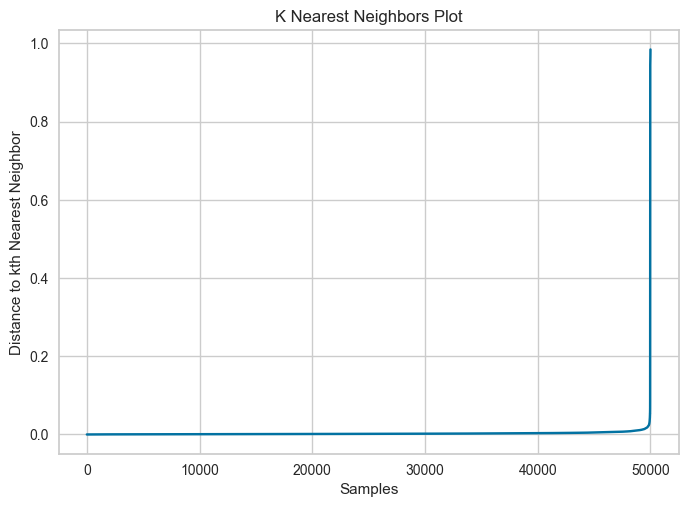

In [801]:
nn = NearestNeighbors(n_neighbors=5)
nn.fit(x_pca)
distances, _ = nn.kneighbors(x_pca)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  
plt.plot(distances)
plt.xlabel('Samples')
plt.ylabel('Distance to kth Nearest Neighbor')
plt.title('K Nearest Neighbors Plot')
plt.show()

In [802]:
db_scan = DBSCAN(eps=3, min_samples=2650, n_jobs=-1)

In [803]:
y_pred = db_scan.fit_predict(x_pca)

In [804]:
pd.DataFrame(y_pred).value_counts()

 1    25705
 0    23634
-1      661
Name: count, dtype: int64

In [805]:
silhouette_score(x_pca, db_scan.labels_)

0.5401760680944111

In [806]:
tsne_pca = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne_pca = tsne_pca.fit_transform(x_pca)

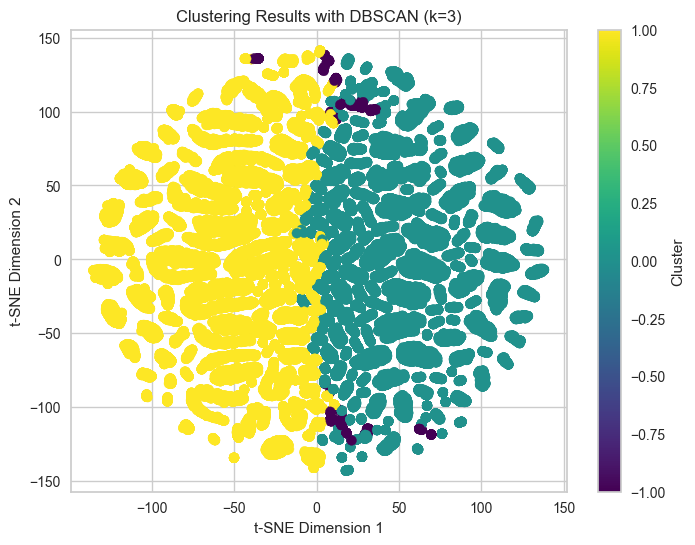

In [807]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], c=db_scan.labels_, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with DBSCAN (k={})'.format(3))
plt.colorbar(label='Cluster')
plt.show()

##### Using Kernel PCA

In [808]:
x_sample_ker = X.sample(20000, random_state=42)
x_sample_ker = MinMaxScaler().fit_transform(x_sample_ker)
pca = KernelPCA(n_components=2, kernel='poly', degree=3, random_state=42, n_jobs=-1)
x_pca = pca.fit_transform(x_sample_ker)

In [809]:
db_scan = DBSCAN(eps=0.3)

In [810]:
y_pred = db_scan.fit_predict(x_pca)
pd.DataFrame(y_pred).value_counts()

0    11713
1     8287
Name: count, dtype: int64

In [811]:
silhouette_score(x_pca, db_scan.labels_)

0.6215197050693895

In [688]:
tsne_pca_ker = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne_pca_ker = tsne_pca_ker.fit_transform(x_pca)

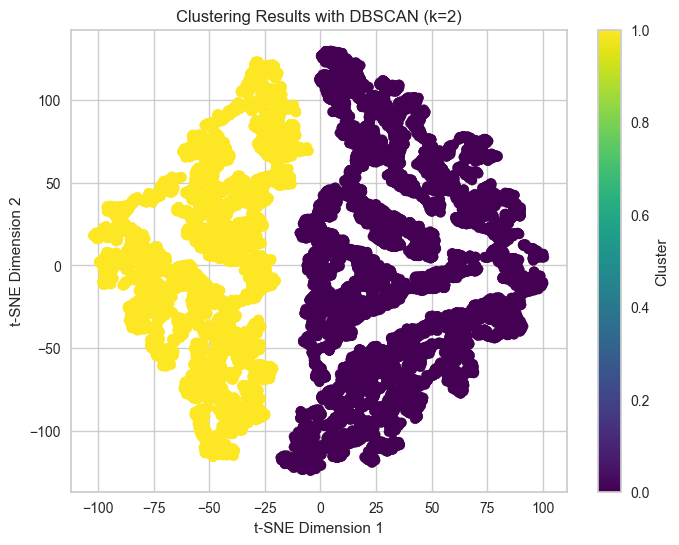

In [828]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_pca_ker[:, 0], X_tsne_pca_ker[:, 1], c=db_scan.labels_, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with DBSCAN (k={})'.format(2))
plt.colorbar(label='Cluster')
plt.show()

### Hierarchical

In [813]:
x_sample1 = X.sample(20000, random_state=42)

In [814]:
x_scaled1 = MinMaxScaler().fit_transform(x_sample1)

In [815]:
spec = SpectralClustering(n_clusters=2)
y_pred = spec.fit_predict(x_scaled1)

In [816]:
silhouette_score(x_scaled1, spec.labels_)

0.26006717310347016

In [817]:
tsne1 = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne1 = tsne1.fit_transform(x_scaled1)

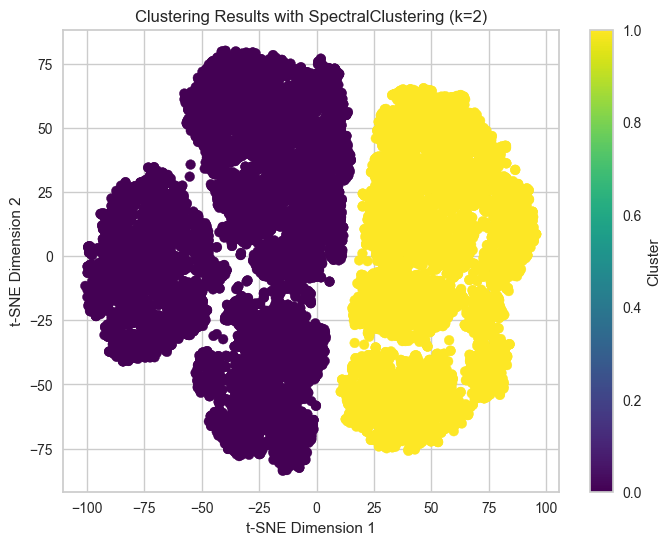

In [829]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=spec.labels_, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with SpectralClustering (k={})'.format(2))
plt.colorbar(label='Cluster')
plt.show()

In [820]:
tsne13 = TSNE(n_components=3, random_state=42, n_jobs=-1)
X_tsne13 = tsne13.fit_transform(x_scaled1)

In [822]:
import plotly.express as px 
import nbformat

fig = px.scatter_3d(pd.DataFrame(X_tsne13), x=0, y=1, z=2, color=spec.labels_) 
fig.show()

### Using PCA

In [823]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x_scaled1)

In [824]:
spec = SpectralClustering(n_clusters=2)
y_pred = spec.fit_predict(x_pca)

In [825]:
tsne1_pca = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne1_pca = tsne1_pca.fit_transform(x_pca)

In [826]:
silhouette_score(x_pca, spec.labels_)

0.6276435604380305

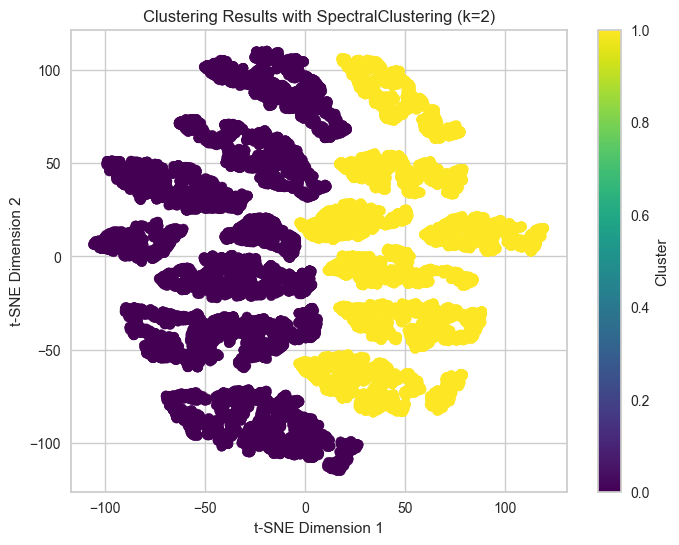

In [827]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne1_pca[:, 0], X_tsne1_pca[:, 1], c=spec.labels_, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with SpectralClustering (k={})'.format(2))
plt.colorbar(label='Cluster')
plt.show()

### Using KernelPCA

In [830]:
x_sample_ker = X.sample(20000, random_state=42)
x_sample_ker = MinMaxScaler().fit_transform(x_sample_ker)
pca = KernelPCA(n_components=2, kernel='poly', degree=3, random_state=42, n_jobs=-1)
x_pca = pca.fit_transform(x_sample_ker)

In [834]:
spec = SpectralClustering(n_clusters=2)
y_pred = spec.fit_predict(x_pca)

In [835]:
silhouette_score(x_pca, spec.labels_)

0.6215197050693895

In [836]:
tsne_pca_ker = TSNE(n_components=2, random_state=42, n_jobs=-1)
X_tsne_pca_ker = tsne_pca_ker.fit_transform(x_pca)

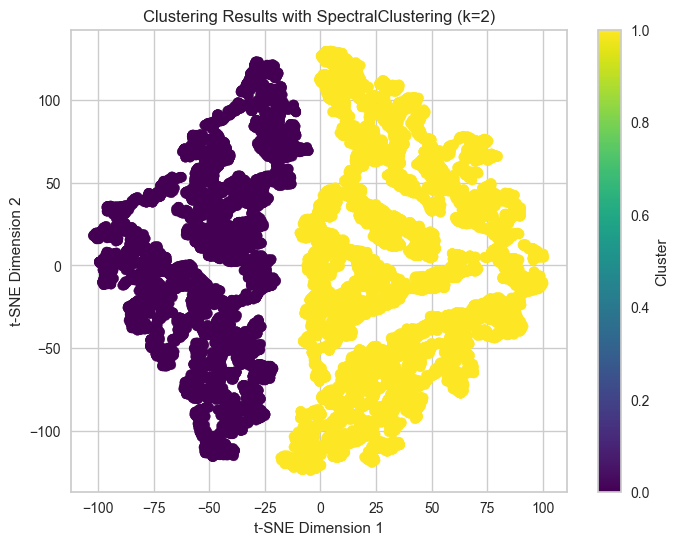

In [837]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_pca_ker[:, 0], X_tsne_pca_ker[:, 1], c=spec.labels_, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with SpectralClustering (k={})'.format(2))
plt.colorbar(label='Cluster')
plt.show()

In [838]:
from sklearn.mixture import GaussianMixture

In [842]:
y_pred = gm.fit_predict(x_sample)
silhouette_score(x_sample, y_pred)

0.5806628035071649

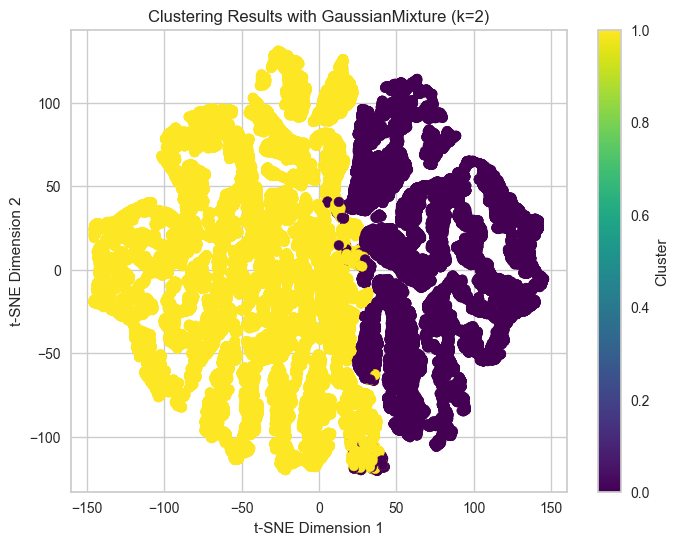

In [843]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with GaussianMixture (k={})'.format(2))
plt.colorbar(label='Cluster')
plt.show()

In [844]:
y_pred = gm.fit_predict(x_scaled1)
silhouette_score(x_scaled1, y_pred)

0.26006717310347016

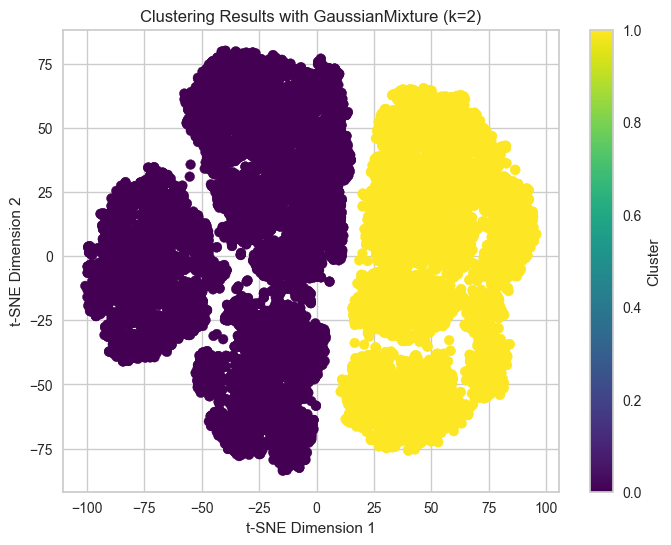

In [845]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with GaussianMixture (k={})'.format(2))
plt.colorbar(label='Cluster')
plt.show()

In [839]:
gm = GaussianMixture(n_components=2, init_params='k-means++', random_state=42)
y_pred = gm.fit_predict(x_pca)

In [840]:
silhouette_score(x_pca, y_pred)

0.6215197050693895

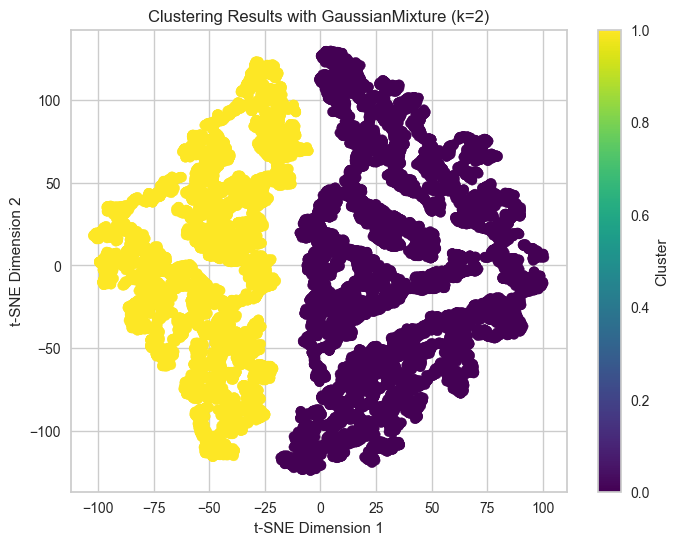

In [841]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_pca_ker[:, 0], X_tsne_pca_ker[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Clustering Results with GaussianMixture (k={})'.format(2))
plt.colorbar(label='Cluster')
plt.show()

## Conclusion for this problem
Write a conclusion and references which you've used in your homework